# Credit EDA Case Study

## Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: 
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


The data contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
* The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan.
* All other cases: All other cases when the payment is paid on time.

## Business Objectives

* The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.
* This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected.
* Identification of such applicants using EDA is the aim of this case study.
* AnalysisisdoneusingPythononaJupyternotebook.

## Analysis of Application Data

In [1]:
##importing the useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##ignoring warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
##reading the dataframe

df = pd.read_csv("application_data.csv")

In [4]:
## Checking the first 5 records of the dataframe
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## Expanding the output display to see all columns of the dataframe

pd.set_option('display.max_columns',500)
pd.set_option("display.max_rows",500)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
## Checking the dimensionality of the dataframe

df.shape

(307511, 122)

In [7]:
## Checking the concise summary of the dataframe

df.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Handling missing values

In [8]:
## Getting the list of columns with null values

df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [9]:
len(df.columns[df.isnull().any()])

67

A total of 67 columns are there in the dataframe having a null value or more
        

In [10]:
## Finding number of missing values in each columns

df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
## Finding percentage of missing values in each columns

missing_cols = 100*df.isnull().mean()
missing_cols

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
## Finding columns with more than 40% of missing values and converting the column names to a list

missing_cols_40 = missing_cols[missing_cols.values > 40].index.to_list()
missing_cols_40

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [13]:
## Dropping all the columns having more than 40% of null values

df = df.drop(labels = missing_cols_40, axis = 1)

In [14]:
## Checking the percentage of missing values in each columns again

100*df.isnull().mean().sort_values(ascending = False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [15]:
## Listing and dropping the columns which are not much relavant for the analysis

cols_not_relevant = [
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_7',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_19',
 'FLAG_WORK_PHONE',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_8',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_18',
 'REGION_RATING_CLIENT',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_12',
 'CNT_FAM_MEMBERS',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_9',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
"NAME_TYPE_SUITE", 
"DAYS_ID_PUBLISH",
"WEEKDAY_APPR_PROCESS_START", 
"HOUR_APPR_PROCESS_START", 
"REG_REGION_NOT_LIVE_REGION", 
"REG_REGION_NOT_WORK_REGION", 
"LIVE_REGION_NOT_WORK_REGION", 
"REG_CITY_NOT_LIVE_CITY", 
"REG_CITY_NOT_WORK_CITY", 
"LIVE_CITY_NOT_WORK_CITY", 
"DAYS_LAST_PHONE_CHANGE"]



df.drop(labels=cols_not_relevant,axis=1,inplace=True)

In [16]:
## Checking the percentage of missing values in each columns again

100*df.isnull().mean().sort_values(ascending = False)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
REGION_POPULATION_RELATIVE     0.000000
ORGANIZATION_TYPE              0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_FAMILY_STATUS             0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
AMT_CREDIT                     0.000000
AMT_INCOME_TOTAL               0.000000
CNT_CHILDREN                   0.000000
FLAG_OWN_REALTY                0.000000
FLAG_OWN_CAR                   0.000000


In [17]:
## Imputing missing values in OCCUPATION_TYPE

## Finding the most common value

mode = df.OCCUPATION_TYPE.mode()[0]
mode

'Laborers'

In [18]:
## Replacing missing values with the most common value

df["OCCUPATION_TYPE"].fillna(mode, inplace = True)

In [19]:
## Imputing missing values in EXT_SOURCE_3 and EXT_SOURCE_2 with the median of the values

df["EXT_SOURCE_3"] = df["EXT_SOURCE_3"].fillna(df["EXT_SOURCE_3"].median())
df["EXT_SOURCE_2"] = df["EXT_SOURCE_2"].fillna(df["EXT_SOURCE_2"].median())


In [20]:
## Imputing missing values in AMT_ANNUITY and AMT_GOODS_PRICE with the median of the values

df["AMT_ANNUITY"] = df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median())
df["AMT_GOODS_PRICE"] = df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].median())

In [21]:
## Imputing missing values in OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,
    # OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE with the median of the values.

df["OBS_30_CNT_SOCIAL_CIRCLE"] = df["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(df["OBS_30_CNT_SOCIAL_CIRCLE"].median())
df["DEF_30_CNT_SOCIAL_CIRCLE"] = df["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(df["DEF_30_CNT_SOCIAL_CIRCLE"].median())
df["OBS_60_CNT_SOCIAL_CIRCLE"] = df["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(df["OBS_60_CNT_SOCIAL_CIRCLE"].median())
df["DEF_60_CNT_SOCIAL_CIRCLE"] = df["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(df["DEF_60_CNT_SOCIAL_CIRCLE"].median())

In [22]:
## Imputing missing values in AMT_REQ_CREDIT_BUREAU_HOUR with the median of the values

df["AMT_REQ_CREDIT_BUREAU_HOUR"] = df["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(df["AMT_REQ_CREDIT_BUREAU_HOUR"].median())

In [23]:
## Checking the number of missing values

df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
OCCUPATION_TYPE               0
ORGANIZATION_TYPE             0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_HOUR    0
dtype: int64

There are no more missing values in the dataframe.

In [24]:
## Checking the number of unique values in each columns

df.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     17460
DAYS_EMPLOYED                  12574
DAYS_REGISTRATION              15688
OCCUPATION_TYPE                   18
ORGANIZATION_TYPE                 58
EXT_SOURCE_2                  119831
EXT_SOURCE_3                     814
OBS_30_CNT_SOCIAL_CIRCLE          33
DEF_30_CNT_SOCIAL_CIRCLE          10
OBS_60_CNT_SOCIAL_CIRCLE          33
DEF_60_CNT_SOCIAL_CIRCLE           9
A

CODE_GENDER shows 3 unique values instead of the expected 2

In [25]:
## Checking the values in CODE_GENDER

df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There is a value "XNA" in CODE_GENDER column other than M and F

In [26]:
## Imputing XNA values with the most common value in the column

mode = df.CODE_GENDER.mode()[0]
df["CODE_GENDER"] = df["CODE_GENDER"].replace("XNA", mode)

In [27]:
## Checking the values in CODE_GENDER again

df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [28]:
df.ORGANIZATION_TYPE.value_counts()

## There are 55374 rows with 'XNA' as the ORGANIZATION_TYPE

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [29]:
## Dropping the rows with "XNA" values

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape
df.reset_index(inplace = True, drop = True)

In [30]:
## Creating a new column EXT_SOURCE_SCORE by taking the average of EXT_SOURCE_2 and EXT_SOURCE_3 for a more simplified analysis.

df['EXT_SOURCE_SCORE'] = round(((df['EXT_SOURCE_2'] + df['EXT_SOURCE_2'])/2),2)

## Dropping columns EXT_SOURCE_2 and EXT_SOURCE_3

df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

## Correcting Data

In [31]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,Laborers,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.62
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.56
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,Laborers,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,Core staff,Religion,0.0,0.0,0.0,0.0,0.0,0.32


Columns DAYS_BIRTH, DAYS_EMPLOYED and DAYS_REGISTRATION have negative values

In [32]:
## Changing those values to absolute values

df[["DAYS_BIRTH","DAYS_EMPLOYED", "DAYS_REGISTRATION"]] = abs(df[["DAYS_BIRTH","DAYS_EMPLOYED", "DAYS_REGISTRATION"]])


Values in columns DAYS_BIRTH and DAYS_EMPLOYED are in days. It will be easier to analyse if the values are converted to years.

In [33]:
## creating 2 new columns - AGE and YEARS_EMPLOYED from DAYS_BIRTH and DAYS_BIRTH respectively.

df["AGE"] = (df.DAYS_BIRTH)/365
df["YEARS_EMPLOYED"] = (df.DAYS_EMPLOYED)/365

In [34]:
## dropping DAYS_BIRTH and DAYS_EMPLOYED columns

df.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'],inplace=True)

In [35]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OCCUPATION_TYPE,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,EXT_SOURCE_SCORE,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,Laborers,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.26,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1186.0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.62,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.56,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,Laborers,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.65,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,Core staff,Religion,0.0,0.0,0.0,0.0,0.0,0.32,54.608219,8.323288


## Binning

Binning the values in AGE column will help us to analyse the data easier

<Axes: >

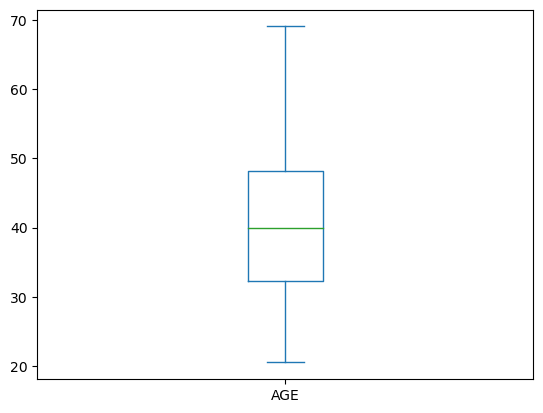

In [36]:
## Plotting a box plot to check the spread of the values

df.AGE.plot.box()

Values in column AGE spreads between 20 and 70

In [37]:
## Creating bins to make the analysis easier

df["AGE_GROUP"] = pd.cut(df.AGE, [20,30,40,50,60,999],labels = ["20-30", "30-40", "40-50", "50-60", "60+"])

In [38]:
## Creating bins with the values in YEARS_EMPLOYED column

df["WORK_EXPERIENCE"] = pd.cut(df.YEARS_EMPLOYED, [0,2,5,10,15,20,25,30,99],labels = ["0-2", "2-5", "5-10", "10-15", "15-20","20-25","25-30","30+"])

In [39]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OCCUPATION_TYPE,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,EXT_SOURCE_SCORE,AGE,YEARS_EMPLOYED,AGE_GROUP,WORK_EXPERIENCE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,Laborers,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.26,25.920548,1.745205,20-30,0-2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1186.0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.62,45.931507,3.254795,40-50,2-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.56,52.180822,0.616438,50-60,0-2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,Laborers,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.65,52.068493,8.326027,50-60,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,Core staff,Religion,0.0,0.0,0.0,0.0,0.0,0.32,54.608219,8.323288,50-60,5-10


In [40]:
## Creating bins with the values in AMT_INCOME_TOTAL column to make the analysis easier
bins = [0,25000,50000,100000,200000,300000,500000,10000000000]
salary = ['0-25000', '25000-50000','50000-100000','100000-200000','200000-300000','300000-500000',"500000+"]

df['INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=salary)

In [41]:
## Creating bins with the values in AMT_CREDIT column to make the analysis easier

bins = [0,50000,100000,200000,300000,500000,750000,1000000,1000000000]
amounts = ["0-50000","50000-100000","100000-200000","200000-300000","300000-500000","500000-750000","750000-1000000","1000000+"]
df['CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=amounts)

In [42]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OCCUPATION_TYPE,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,EXT_SOURCE_SCORE,AGE,YEARS_EMPLOYED,AGE_GROUP,WORK_EXPERIENCE,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,Laborers,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.26,25.920548,1.745205,20-30,0-2,200000-300000,300000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1186.0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.62,45.931507,3.254795,40-50,2-5,200000-300000,1000000+
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.56,52.180822,0.616438,50-60,0-2,50000-100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,Laborers,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.65,52.068493,8.326027,50-60,5-10,100000-200000,300000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,Core staff,Religion,0.0,0.0,0.0,0.0,0.0,0.32,54.608219,8.323288,50-60,5-10,100000-200000,500000-750000


## Outlier detection

Column - CNT_CHILDREN

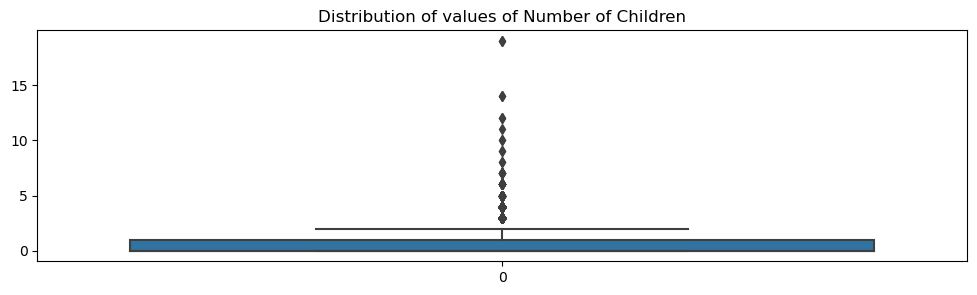

In [43]:
## Plotting a box plot to check the spread of the values.

plt.figure(figsize = (12,3))
ax = sns.boxplot(df['CNT_CHILDREN'])
ax.set(title ="Distribution of values of Number of Children")
plt.show()

Most of the data are present in the first quartile.
There are some values far away from the maximum point and they are outliers.

In [44]:
df['CNT_CHILDREN'].value_counts()

0     161911
1      59698
2      26365
3       3629
4        414
5         81
6         19
7          7
8          2
9          2
12         2
10         2
19         2
14         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [45]:
## Removing the data points where CNT_CHILDREN is greater than 10

df= df[df['CNT_CHILDREN']<=10]

Column - YEARS_EMPLOYED

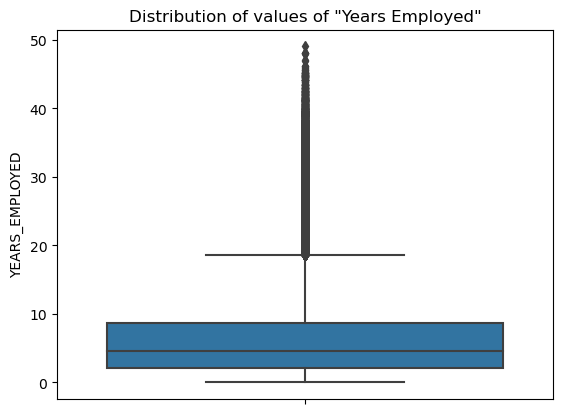

In [46]:
## Analysing YEARS_EMPLOYED column for Outliers

ax = sns.boxplot(y=df['YEARS_EMPLOYED'])
ax.set(title = 'Distribution of values of "Years Employed"')
plt.show()

There are some values outside the Maximum value. But they seem like they are genuine values.
Hence not removing any values from YEARS_EMPLOYED column.

Columns - AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE

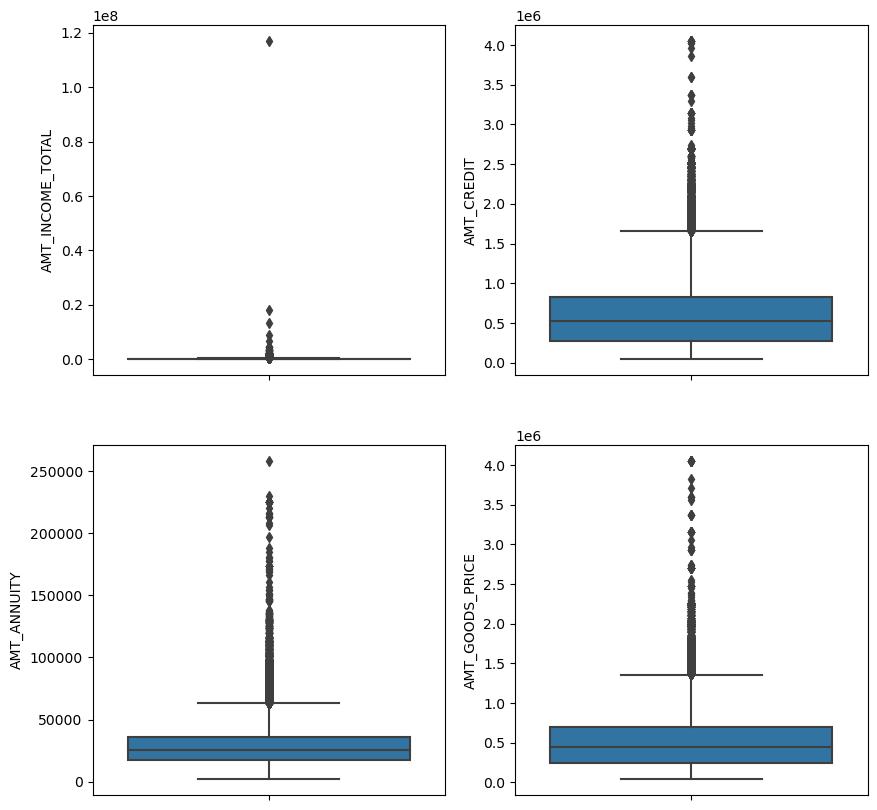

In [47]:
## Analyzing all the AMT columns for outliers

col_names = ["AMT_INCOME_TOTAL", "AMT_CREDIT","AMT_ANNUITY", "AMT_GOODS_PRICE"]

fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
count=0
for i in range(0,2):
    for j in range(0,2):
        sns.boxplot(y=df[col_names[count]],ax=axes[i,j])
        count+=1
plt.show()

There are outliers in AMT_INCOME_TOTAL and AMT_ANNUITY columns

In [48]:
#Removing Outliers

df=df[df['AMT_INCOME_TOTAL']<df['AMT_INCOME_TOTAL'].max()]
df=df[df['AMT_ANNUITY']<df['AMT_ANNUITY'].max()]

In [49]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OCCUPATION_TYPE,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,EXT_SOURCE_SCORE,AGE,YEARS_EMPLOYED,AGE_GROUP,WORK_EXPERIENCE,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,Laborers,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.26,25.920548,1.745205,20-30,0-2,200000-300000,300000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1186.0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.62,45.931507,3.254795,40-50,2-5,200000-300000,1000000+
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.56,52.180822,0.616438,50-60,0-2,50000-100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,Laborers,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.65,52.068493,8.326027,50-60,5-10,100000-200000,300000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,Core staff,Religion,0.0,0.0,0.0,0.0,0.0,0.32,54.608219,8.323288,50-60,5-10,100000-200000,500000-750000


Column - AMT_REQ_CREDIT_BUREAU_HOUR

<Axes: >

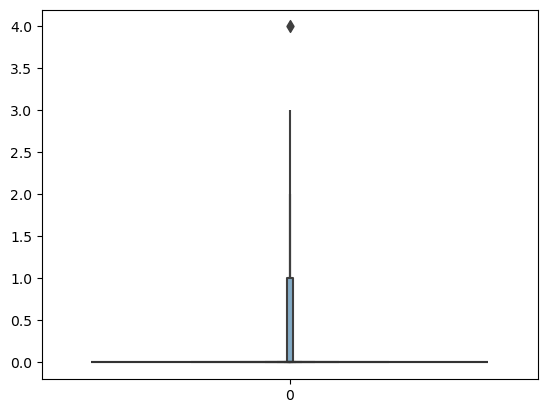

In [50]:
## Analyzing AMT_REQ_CREDIT_BUREAU_HOUR column for outliers

sns.boxenplot(df.AMT_REQ_CREDIT_BUREAU_HOUR)

In [51]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    250755
1.0      1318
2.0        46
3.0         8
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

There is an outlier present in the AMT_REQ_CREDIT_BUREAU_HOUR column. 

## Checking Imbalance for target column `TARGET'

In [52]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False)

0    0.913405
1    0.086595
Name: TARGET, dtype: float64

Almost 91.3% of the values are target0 and the rest of the values are target1. 
So there is a clear data imbalance in the target variable.

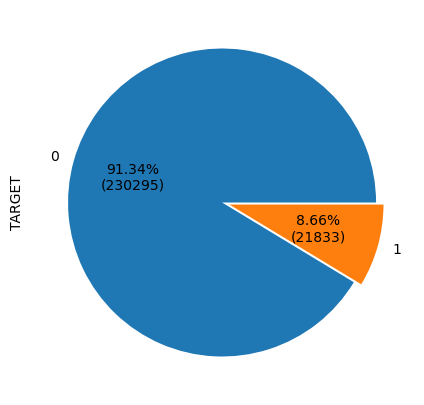

In [53]:
## Plotting a pie chart to visualise the data imbalance

total = len(df["TARGET"])
explode = [0, 0.05]

def format_func(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.figure(figsize = [5, 5])
df["TARGET"].value_counts().plot.pie(autopct = format_func, explode = explode)

plt.show()

In [54]:
round(len(df[df.TARGET == 0])/len(df[df.TARGET == 1]),2)

10.55

The imbalance ratio for the Target variable is 10.55

## Dividing the data based on Target Variable

* TARGET value 1 represents client with payment difficulties. This is only 8.66% of the total data.
* TARGET value 0 represents all other cases than 1. This is 91.34% of the total data

In [55]:
## Dividing the data based on Target Variable

df1 = df[df['TARGET'] == 1] ## Clients with payment difficulties
df0 = df[df['TARGET'] == 0] ## All other clients

## Univariate Analysis 

In [56]:
## Checking the number of unique values in each columns

df.nunique()

SK_ID_CURR                    252128
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      11
AMT_INCOME_TOTAL                2265
AMT_CREDIT                      5331
AMT_ANNUITY                    13189
AMT_GOODS_PRICE                  894
NAME_INCOME_TYPE                   7
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_REGISTRATION              14419
OCCUPATION_TYPE                   18
ORGANIZATION_TYPE                 57
OBS_30_CNT_SOCIAL_CIRCLE          32
DEF_30_CNT_SOCIAL_CIRCLE           9
OBS_60_CNT_SOCIAL_CIRCLE          32
DEF_60_CNT_SOCIAL_CIRCLE           8
AMT_REQ_CREDIT_BUREAU_HOUR         5
EXT_SOURCE_SCORE                  84
AGE                            16513
YEARS_EMPLOYED                 12573
A

[Text(0.5, 0, 'LOAN TYPE')]

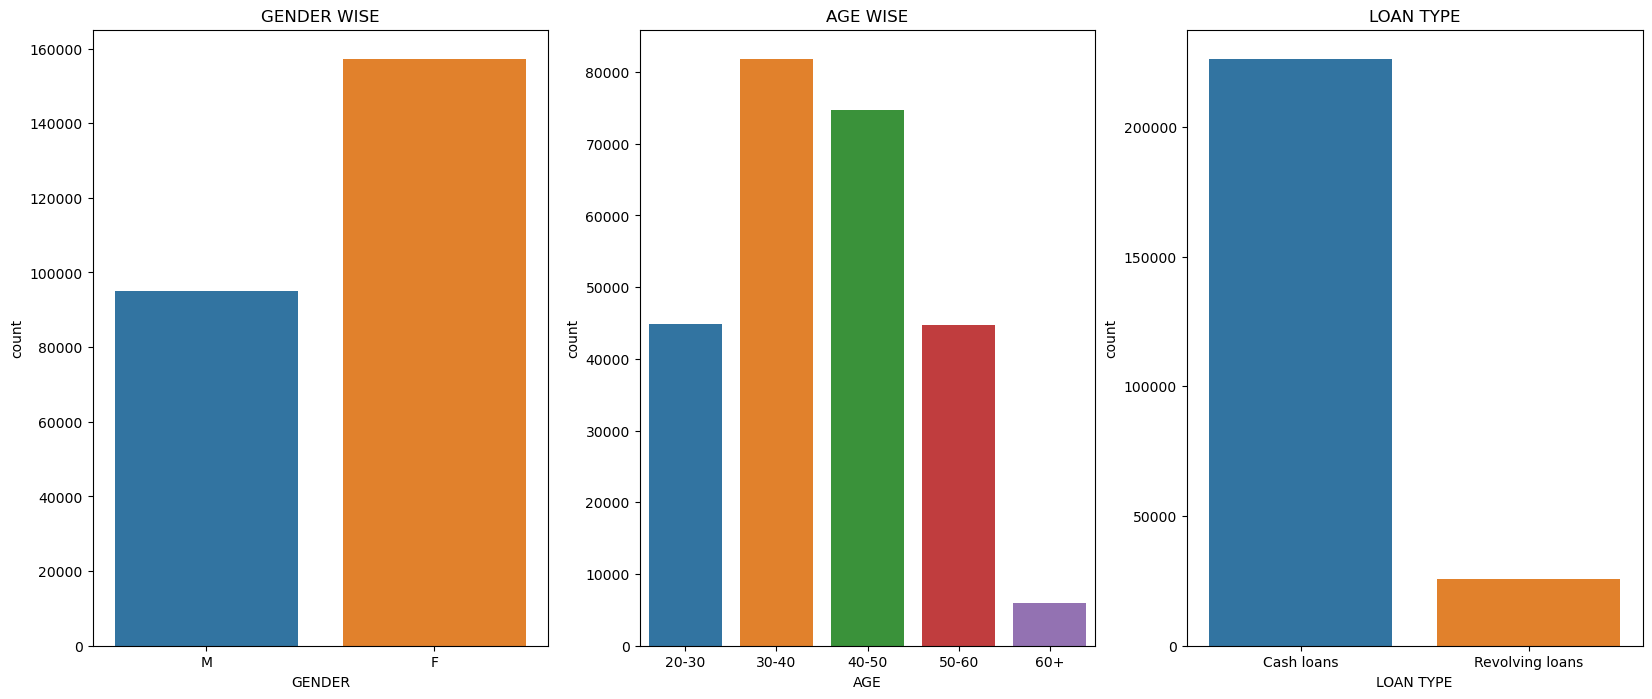

In [57]:
## Plotting countplots for CODE_GENDER,AGE_GROUP and NAME_CONTRACT_TYPE columns.

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df)
ax.set(title = 'GENDER WISE')
ax.set(xlabel='GENDER')

plt.subplot(1,3,2) 
ax = sns.countplot(x = 'AGE_GROUP',data=df)
ax.set(title='AGE WISE')
ax.set(xlabel='AGE')

plt.subplot(1,3,3) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df)
ax.set(title = 'LOAN TYPE')
ax.set(xlabel='LOAN TYPE')

Observations:

  * Bank received more loan applications from female clients compared to the number of applications from male clients.
  * Majority of the applications are from 30-40 age group closely followed by 40-50.
  * Most of the clients applied for Cash loans; Number of people who applied for Revolving loans are comparatively         too low.

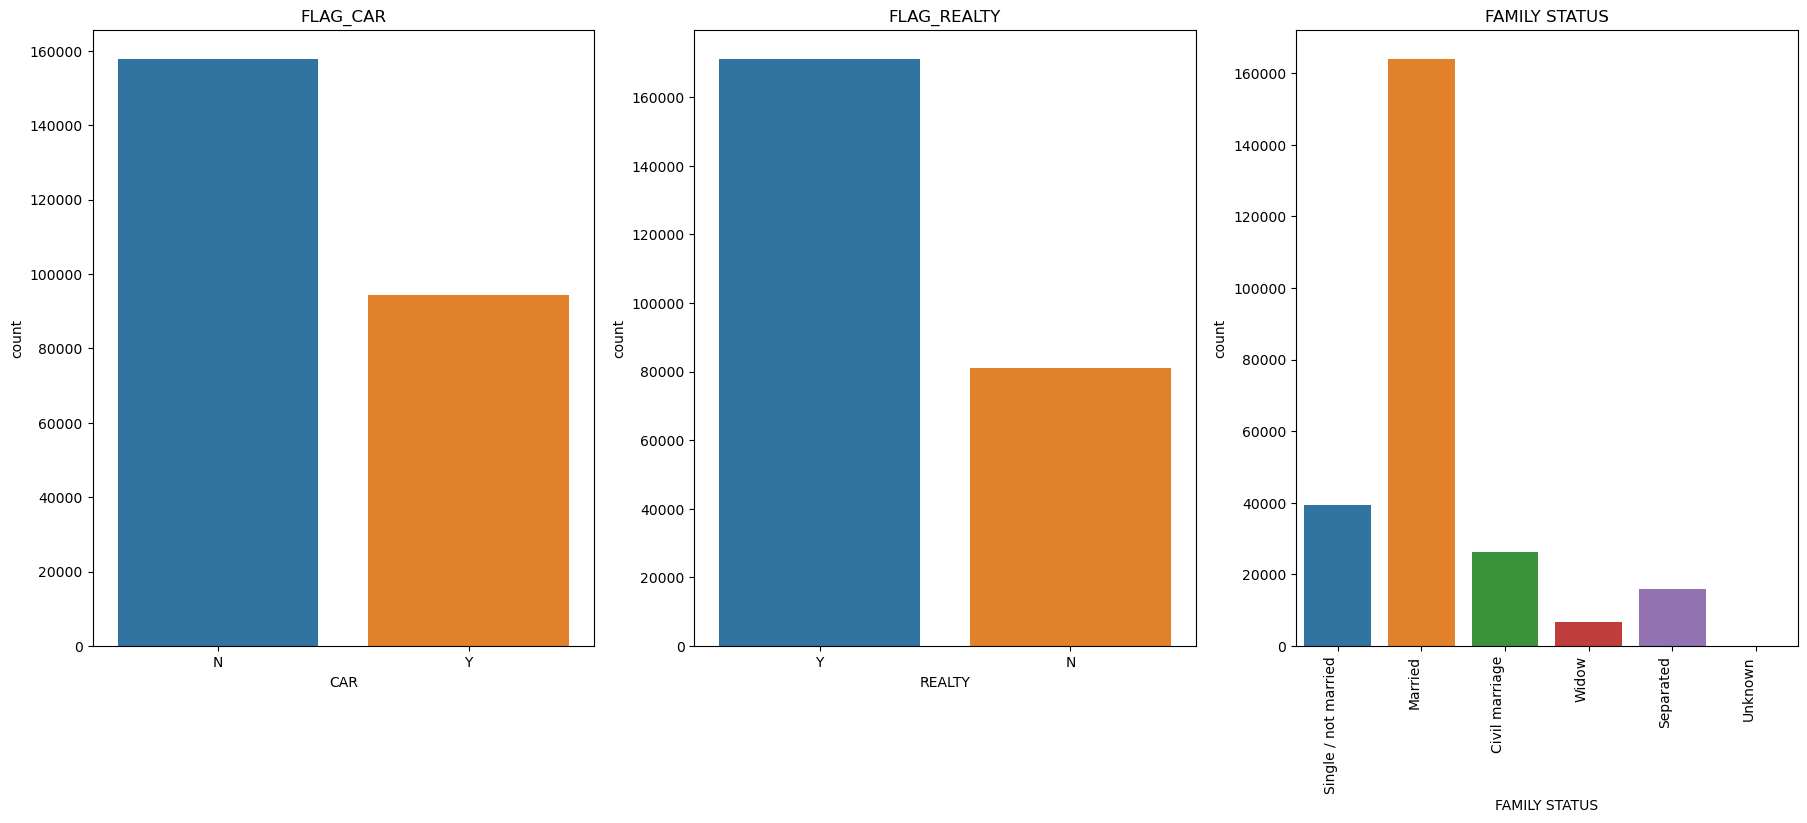

In [58]:
## Plotting countplots for FLAG_OWN_CAR, FLAG_OWN_REALTY and NAME_FAMILY_STATUS columns.

plt.figure(figsize=(22,8))

plt.subplot(1,3,1)    
ax = sns.countplot(x = 'FLAG_OWN_CAR',data=df)
ax.set(title = 'FLAG_CAR')
ax.set(xlabel='CAR')

plt.subplot(1,3,2) 
ax = sns.countplot(x = 'FLAG_OWN_REALTY',data=df)
ax.set(title='FLAG_REALTY')
ax.set(xlabel='REALTY')

plt.subplot(1,3,3) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df)
ax.set(title = 'FAMILY STATUS')
ax.set(xlabel='FAMILY STATUS')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

   * Most of the clients who applied for the loan own a house or flat and more than half of them own a car too.
   * Majority of the loan applicants are married.

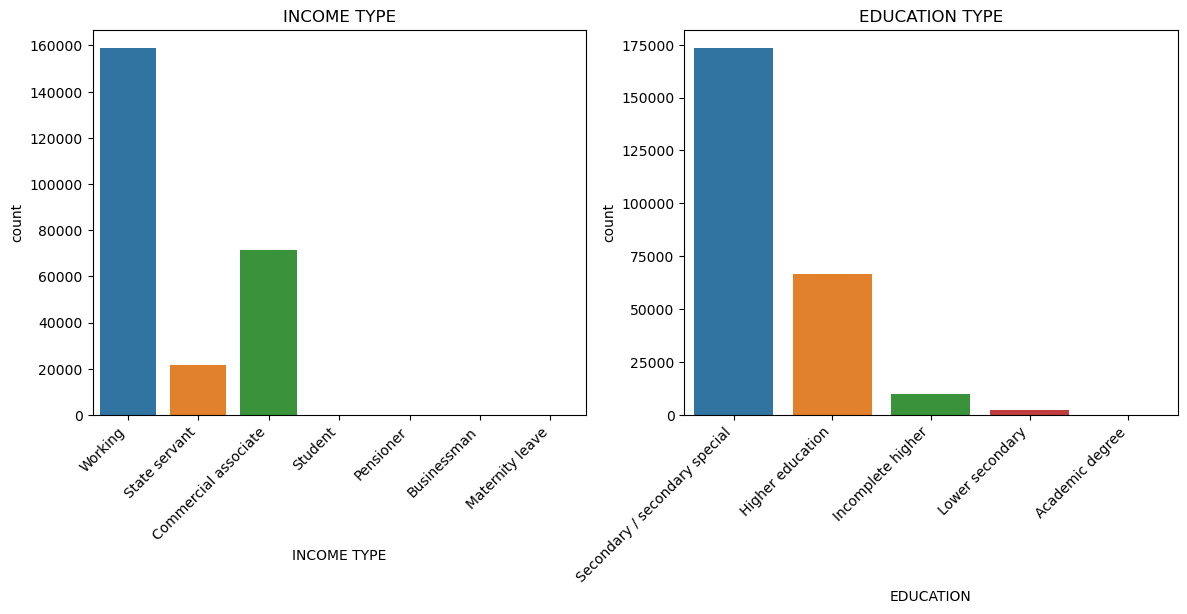

In [59]:
## Plotting countplots for NAME_INCOME_TYPE and NAME_EDUCATION_TYPE columns.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df)
ax.set(title = 'INCOME TYPE')
ax.set(xlabel='INCOME TYPE')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df)
ax.set(title = 'EDUCATION TYPE')
ax.set(xlabel='EDUCATION')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Observations:

    * Out of the total applicants, majority of the clients are Working class followed by Commercial associate and             State servant respectively.
    * Education type of most number of clients who applied for the loan is Secondary/Seconday Special followed 
    by Higher Education.

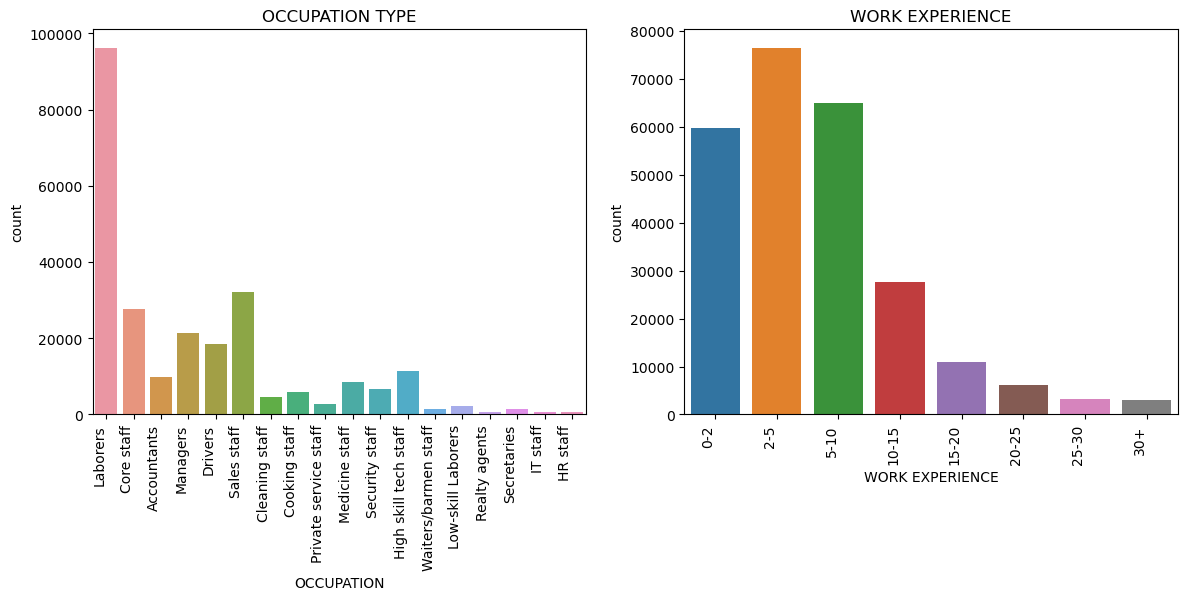

In [60]:
## Plotting countplots for OCCUPATION_TYPE and WORK_EXPERIENCE columns.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=df)
ax.set(title = 'OCCUPATION TYPE')
ax.set(xlabel='OCCUPATION')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'WORK_EXPERIENCE',data=df)
ax.set(title = 'WORK EXPERIENCE')
ax.set(xlabel='WORK EXPERIENCE')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * Majority of the loan applicants are Laborers.
    * Most of the applicants are with a work experience of 2-5 years closely followed by people with 5-10 years of           experience.

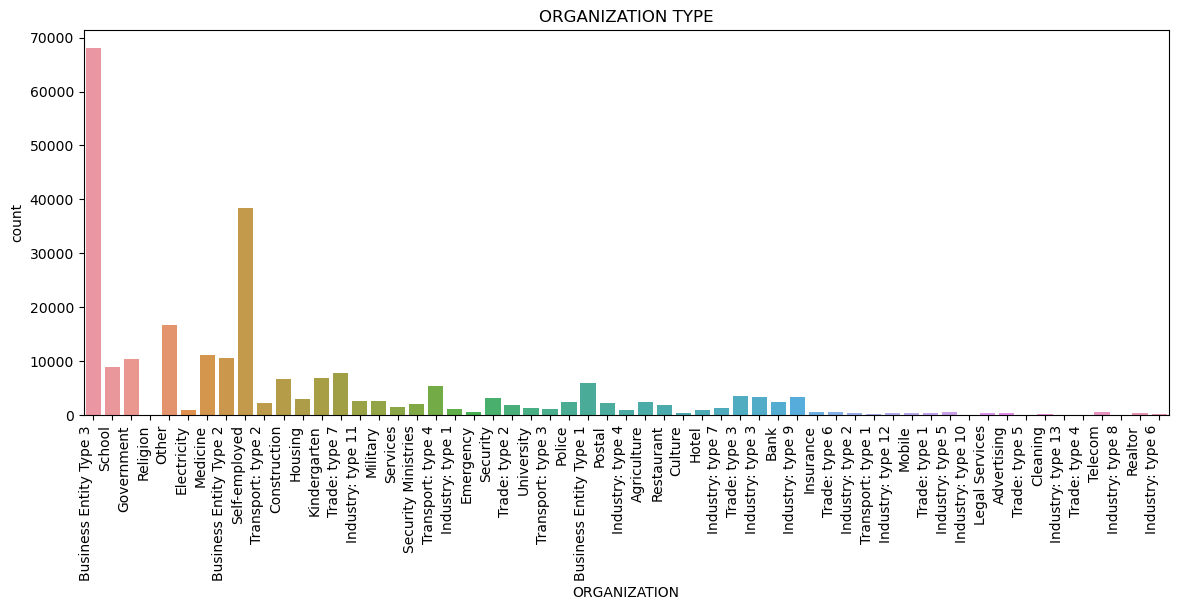

In [61]:
## Plotting countplot for ORGANIZATION_TYPE.

plt.figure(figsize=(14,5))
ax = sns.countplot(x = 'ORGANIZATION_TYPE',data=df)
ax.set(title = 'ORGANIZATION TYPE')
ax.set(xlabel='ORGANIZATION')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * While considering the organization type, people who are from Business Entity Type3 category are the majority 
        who applied for the loan followed by self-employed category.

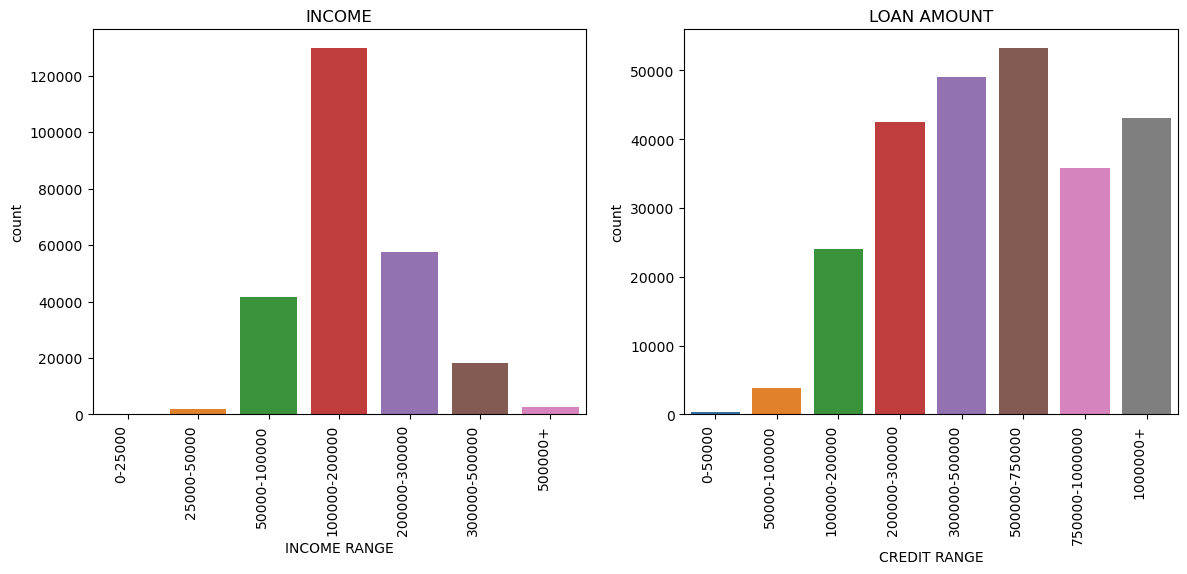

In [62]:
## Plotting countplots for INCOME_RANGE and CREDIT_RANGE.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_RANGE',data=df)
ax.set(title = 'INCOME')
ax.set(xlabel='INCOME RANGE')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_RANGE',data=df)
ax.set(title = 'LOAN AMOUNT')
ax.set(xlabel='CREDIT RANGE')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * Most number of loan applicants fall in to an income range of 100000 - 200000.
    * Majority of the applicants have applied for a loan ranging between 500000 to 700000 closely followed by 
       300000 - 500000.

## Univariate Analysis for Target 1 and Target 0 - Categorical variables

### Defaulters refers to people with payment difficulties.
### Non-Defaulters referes to all other cases.

[Text(0.5, 0, 'Gender')]

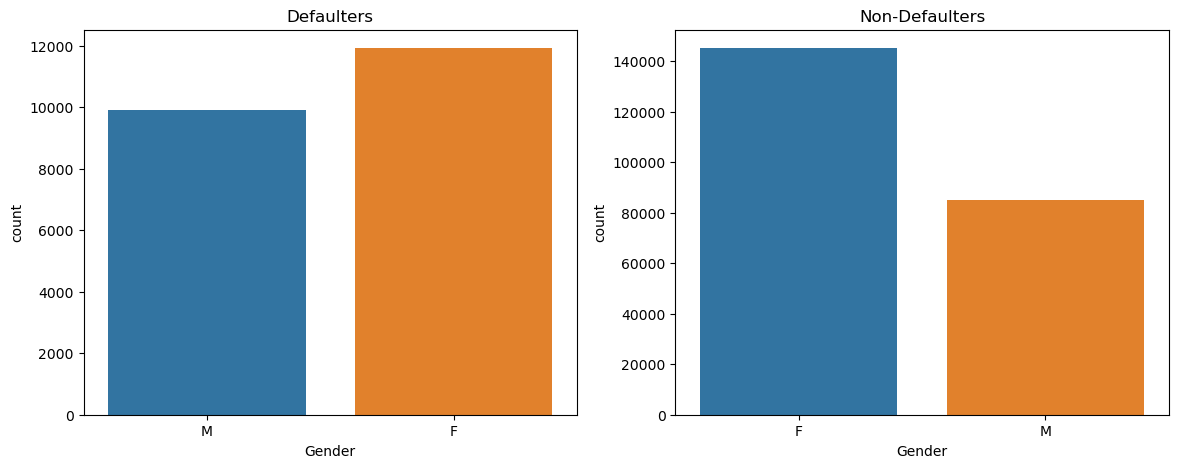

In [63]:
## Plotting countplots for delaulters and non defaulters on basis of gender

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df1)
ax.set(title = 'Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df0)
ax.set(title = 'Non-Defaulters')
ax.set(xlabel='Gender')

Observations:

    * More number of defaulters are female; number of non-defaulters also follow the same trend.
   

[Text(0.5, 0, 'Loan Type')]

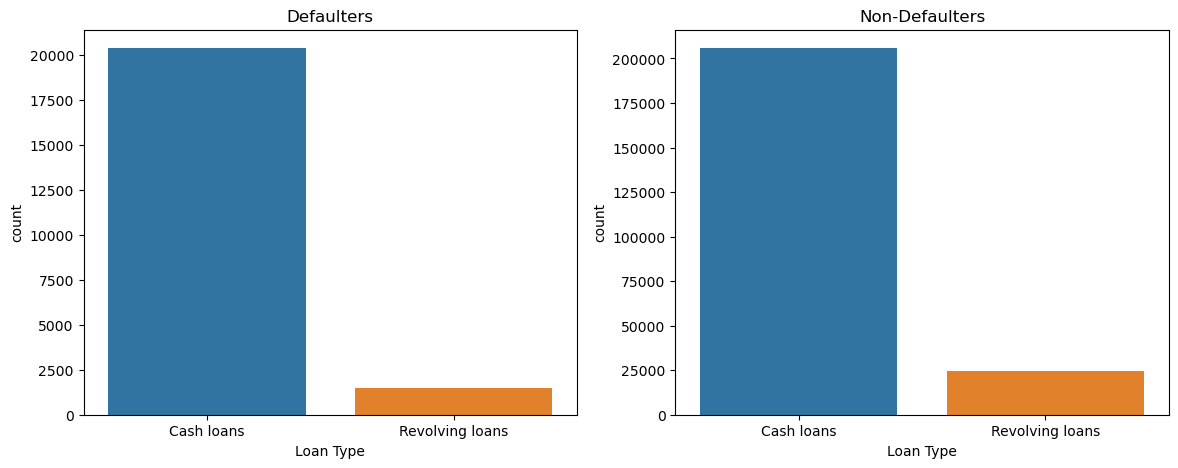

In [64]:
## Plotting countplots for delaulters and non defaulters on the basis of Loan type.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df1)
ax.set(title = 'Defaulters')
ax.set(xlabel='Loan Type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df0)
ax.set(title = 'Non-Defaulters')
ax.set(xlabel='Loan Type')

Observations:

    * Majority of the clients have applied for Cash loans in both the Defaulters and Non-defaulters category. 
    * Revolving loans are very less compared to the Cash loans.
    

[Text(0.5, 0, 'Age Group')]

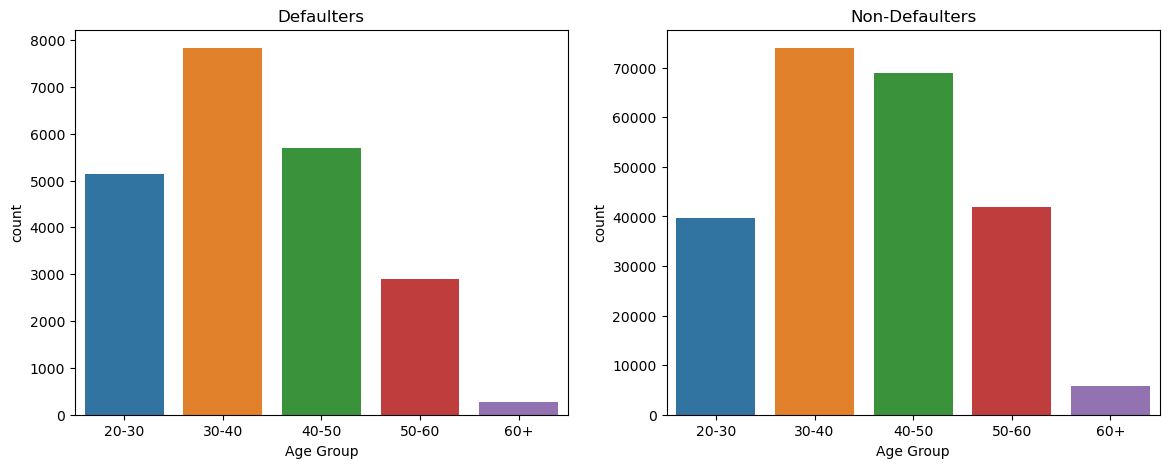

In [65]:
## Plotting countplots for delaulters and non defaulters on basis of Age Group.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AGE_GROUP',data=df1)
ax.set(title = 'Defaulters')
ax.set(xlabel='Age Group')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AGE_GROUP',data=df0)
ax.set(title = 'Non-Defaulters')
ax.set(xlabel='Age Group')

Observations:

    * While considering the Age group, more number of defaulters fall in to the group of 30-40 followed by 40-50.
    * Non-defauters also follow the same trend.

[Text(0.5, 0, 'Score')]

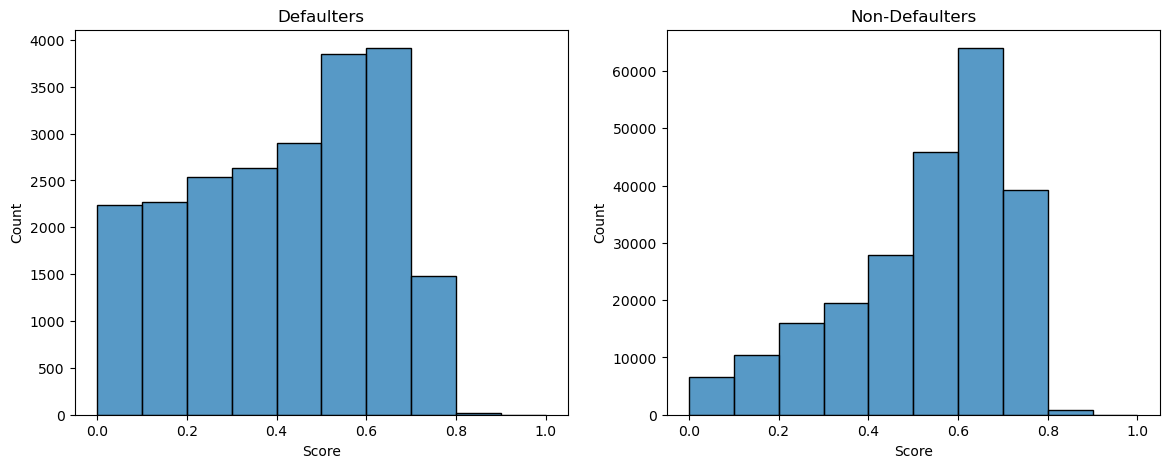

In [66]:
## Plotting histogram for delaulters and non defaulters on basis of Normalized Score from External Data source.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.histplot(df1.EXT_SOURCE_SCORE, bins = ([0,0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
ax.set(title = 'Defaulters')
ax.set(xlabel='Score')

plt.subplot(1,2,2) 
ax = sns.histplot(df0.EXT_SOURCE_SCORE, bins = ([0,0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
ax.set(title = 'Non-Defaulters')
ax.set(xlabel='Score')

Observation:

    * Clients with a Normalized score of 0.5 to 0.7 from external data sources are the most who defaulted the
        repayment.
    * Non-defaulters also follow the same pattern. Majority of the people fall in the score range of 0.5 to 0.7.

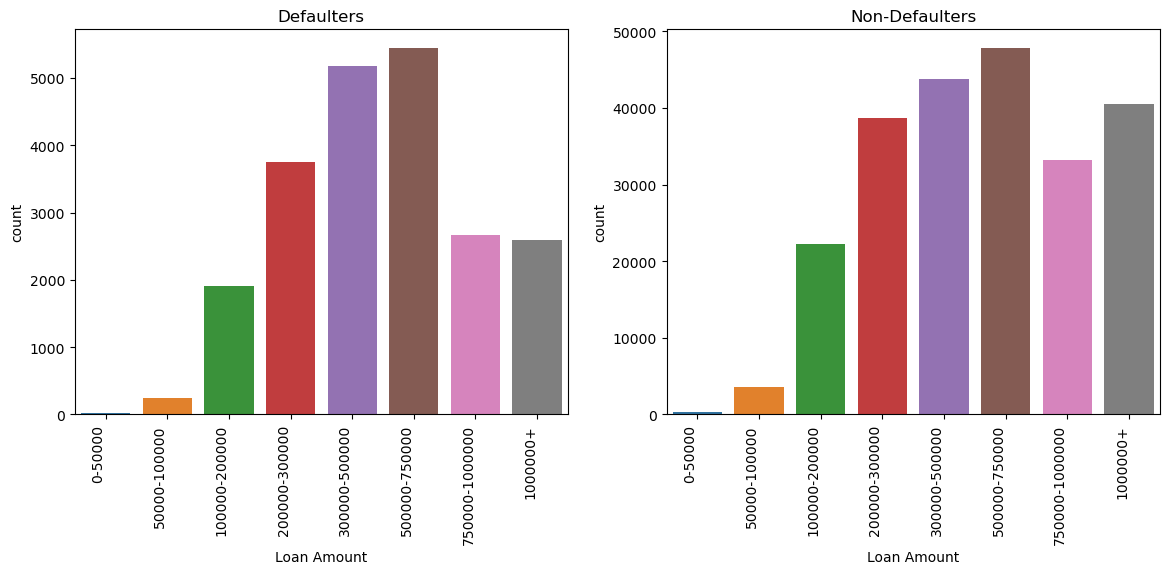

In [67]:
## Plotting countplots for delaulters and non defaulters on basis of Loan amount.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_RANGE',data=df1)
ax.set(title = 'Defaulters')
ax.set(xlabel='Loan Amount')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_RANGE',data=df0)
ax.set(title = 'Non-Defaulters')
ax.set(xlabel='Loan Amount')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * Both the Defaulters and Non-defaulters follow the same trend - Clients who availed the loan amount in the 
      range of 500000-750000 are the most number of people who defaulted the loan repayment. 
    * Most number of people who repaid the loan on time also falls in the same range.

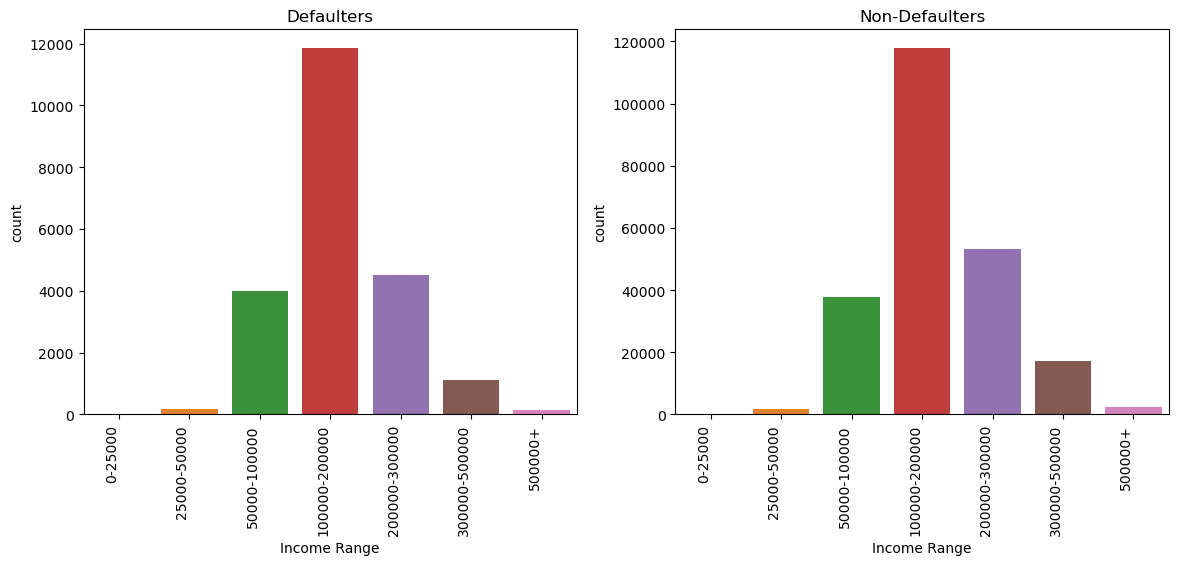

In [68]:
## Plotting countplots for delaulters and non defaulters on basis of Income Range.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_RANGE',data=df1)
ax.set(title = 'Defaulters')
ax.set(xlabel='Income Range')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_RANGE',data=df0)
ax.set(title = 'Non-Defaulters')
ax.set(xlabel='Income Range')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * Most number of defaulters are in the income range of 100000 - 200000.
    * Most number of non - defaulters are also in the same range.

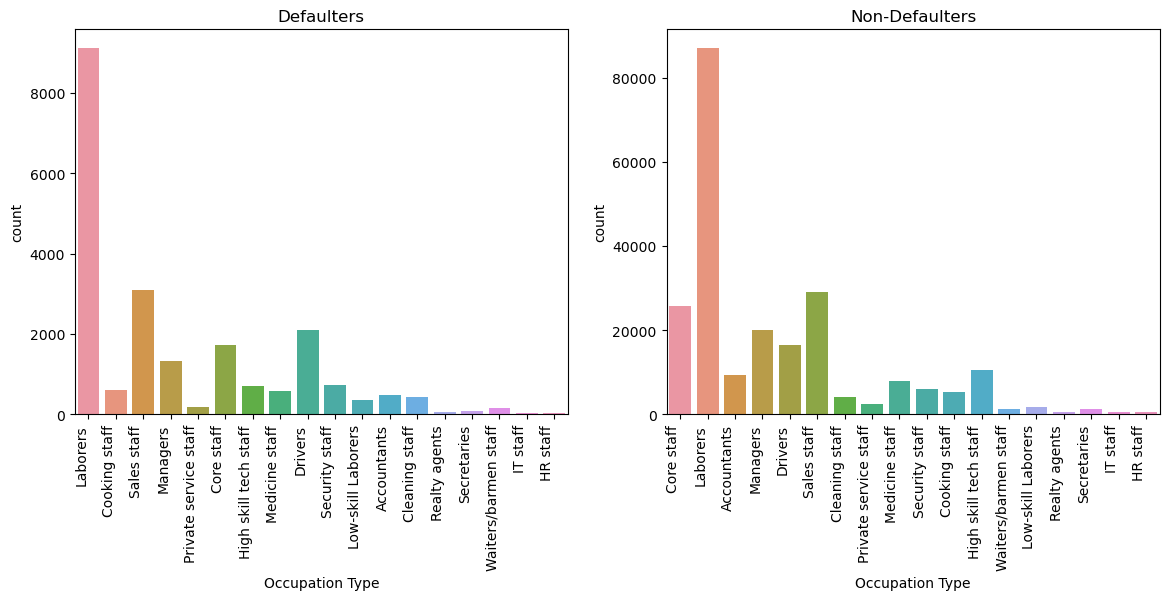

In [69]:
## Plotting countplots for delaulters and non defaulters on basis of OCCUPATION_TYPE.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=df1)
ax.set(title = 'Defaulters')
ax.set(xlabel='Occupation Type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=df0)
ax.set(title = 'Non-Defaulters')
ax.set(xlabel='Occupation Type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

        * Majority of the defaulters and non-defaulters are Laborers followed by Sales staff.

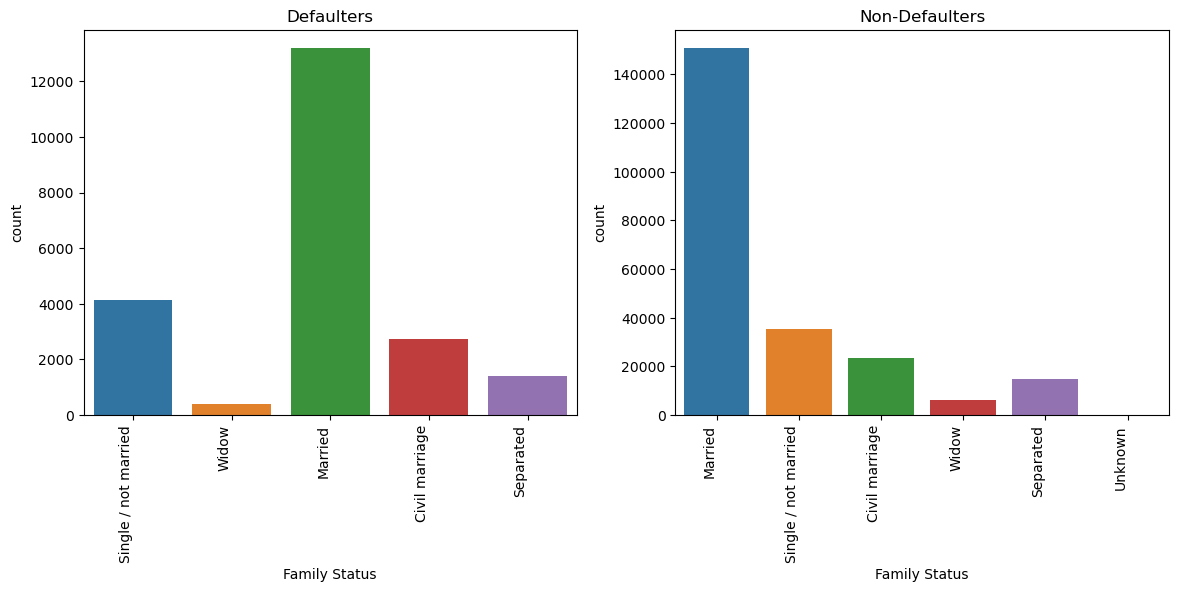

In [70]:
## Plotting countplots for delaulters and non defaulters on basis of Family Status.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df1)
ax.set(title = 'Defaulters')
ax.set(xlabel='Family Status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df0)
ax.set(title = 'Non-Defaulters')
ax.set(xlabel='Family Status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * Majority of the people are married in both the Defaulters and non-defaulters category.

## Univariate Analysis of Target1 and Target 0 - Continuous Variables

[Text(0.5, 1.0, 'Non Defaulters')]

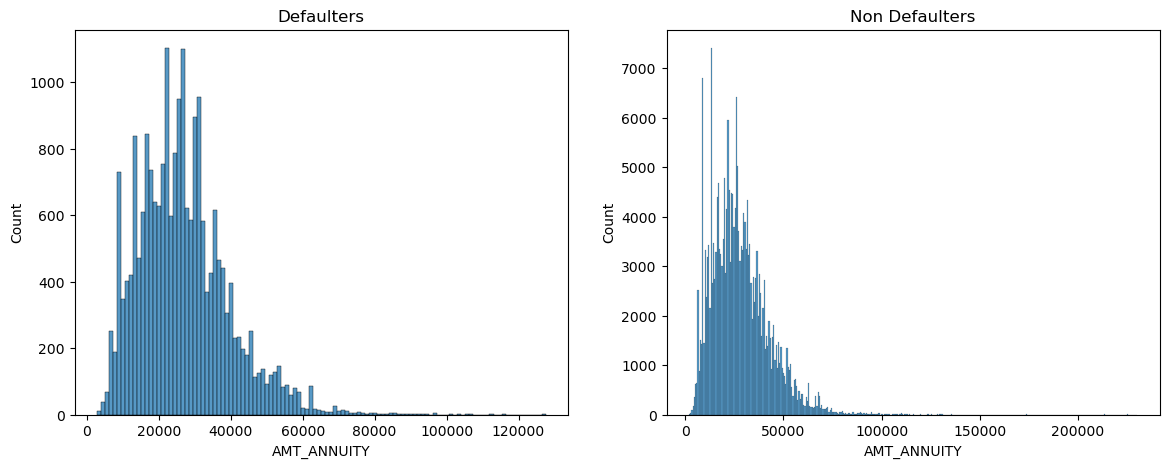

In [71]:
## Plotting histogram for delaulters and non defaulters on basis of AMT_ANNUITY.

plt.figure(figsize=(14,5))
plt.subplot(1,2,1) 
ax = sns.histplot(df1['AMT_ANNUITY'])
ax.set(title = 'Defaulters')

plt.subplot(1,2,2) 
ax = sns.histplot(df0['AMT_ANNUITY'])
ax.set(title = 'Non Defaulters')

Observations:

    * While considering the AMT_ANNUITY, both the Defaulters and Non-defaulters follow a similiar trend.
    * Most of the values are concentrated within the range of 10000 - 50000.

[Text(0.5, 1.0, 'Non Defaulters')]

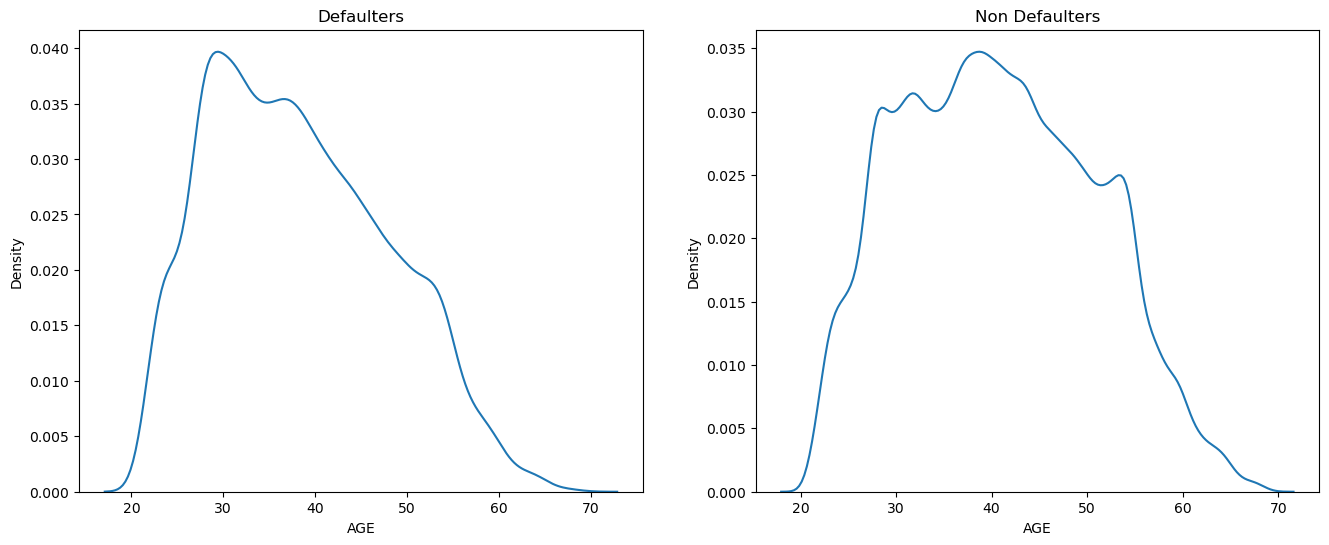

In [72]:
## Plotting distplot for delaulters and non defaulters on basis of AGE.

plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
ax = sns.distplot(df1['AGE'],hist=False)
ax.set(title = "Defaulters")

plt.subplot(1,2,2) 
ax = sns.distplot(df0['AGE'],hist=False)
ax.set(title = "Non Defaulters")

Observations:

    * Incase of defaulters, most number people are from an age group of 25-55. 
    * Non- defaulters also follow a similiar trend.

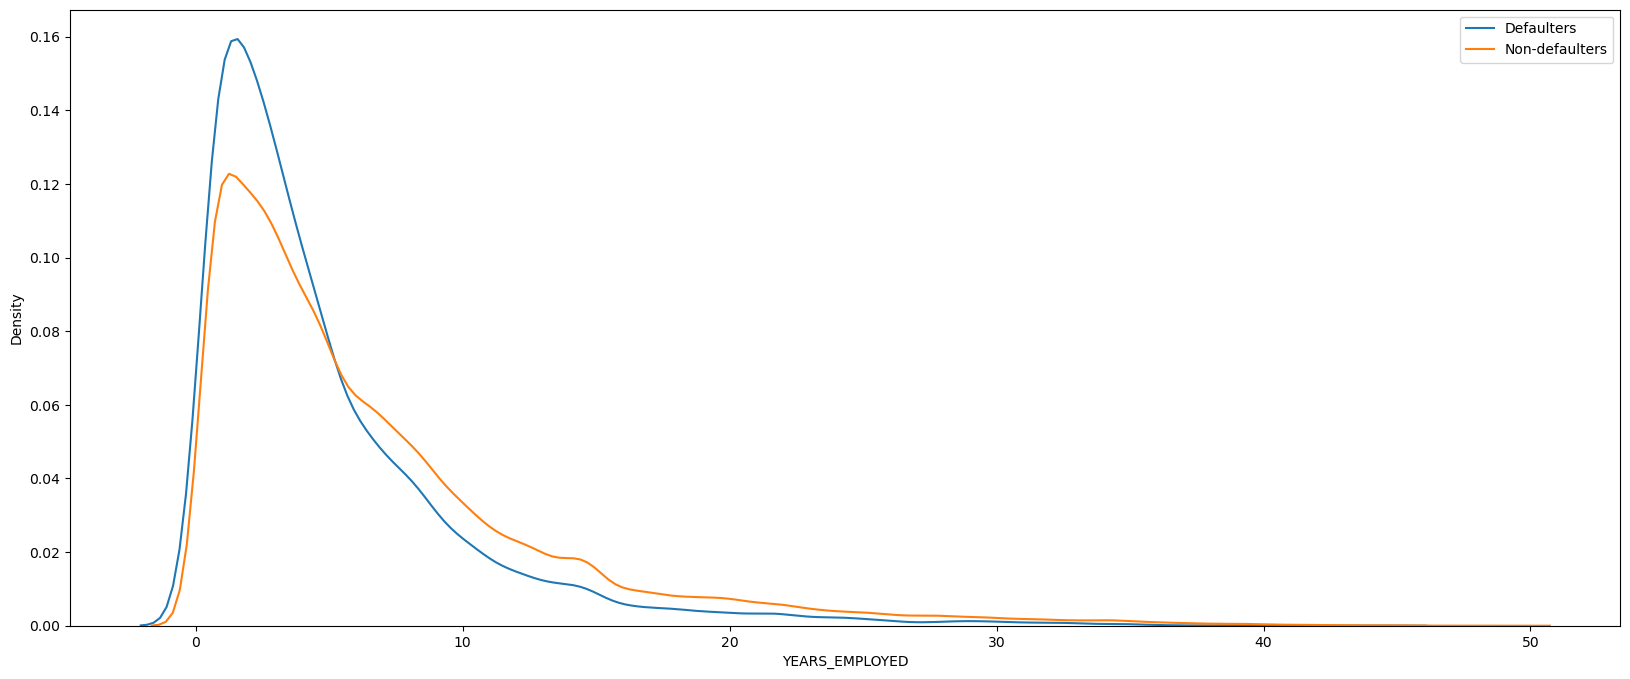

In [73]:
## Plotting distplot for delaulters and non defaulters on basis of YEARS_EMPLOYED.

plt.figure(figsize = [20,8])
sns.distplot(df1.YEARS_EMPLOYED,label = 'Defaulters', hist=False)
sns.distplot(df0.YEARS_EMPLOYED,label = 'Non-defaulters', hist=False)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks()
plt.legend()
plt.show()

Observations:

     * Majority of the defaulters are with less number of work experience.
     * Non-defaulters also follow a similar trend. 
     * People with more number of work experience tend to repay the loan on time.

## Bivariate analysis


Corelation of relevant numerical columns for defaulters and non defaulters


In [74]:
## Listing the relevant columns for finding corelation

cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','YEARS_EMPLOYED']


#### Corelation for defaulters

In [75]:
## Creating a dataframe for those columns for finding corelation.

df1_correlation = df1[cols]
df1_correlation.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,YEARS_EMPLOYED
0,202500.0,406597.5,24700.5,351000.0,25.920548,0.26,1.745205
23,112500.0,979992.0,27076.5,702000.0,51.298630,0.55,7.200000
36,202500.0,1193580.0,35028.0,855000.0,47.895890,0.31,3.457534
38,135000.0,288873.0,16258.5,238500.0,36.668493,0.67,9.854795
82,315000.0,953460.0,64107.0,900000.0,27.942466,0.43,5.520548


In [76]:
## Creating a correlation matrix

df1_correlation.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,YEARS_EMPLOYED
AMT_INCOME_TOTAL,1.000000,0.327046,0.392914,0.331053,0.093690,0.139757,0.029602
AMT_CREDIT,0.327046,1.000000,0.748696,0.982463,0.189468,0.126002,0.106062
AMT_ANNUITY,0.392914,0.748696,1.000000,0.748928,0.090460,0.119630,0.049071
AMT_GOODS_PRICE,0.331053,0.982463,0.748928,1.000000,0.185402,0.136740,0.111948
AGE,0.093690,0.189468,0.090460,0.185402,1.000000,0.142524,0.307061
EXT_SOURCE_SCORE,0.139757,0.126002,0.119630,0.136740,0.142524,1.000000,0.093797
YEARS_EMPLOYED,0.029602,0.106062,0.049071,0.111948,0.307061,0.093797,1.000000


<Axes: >

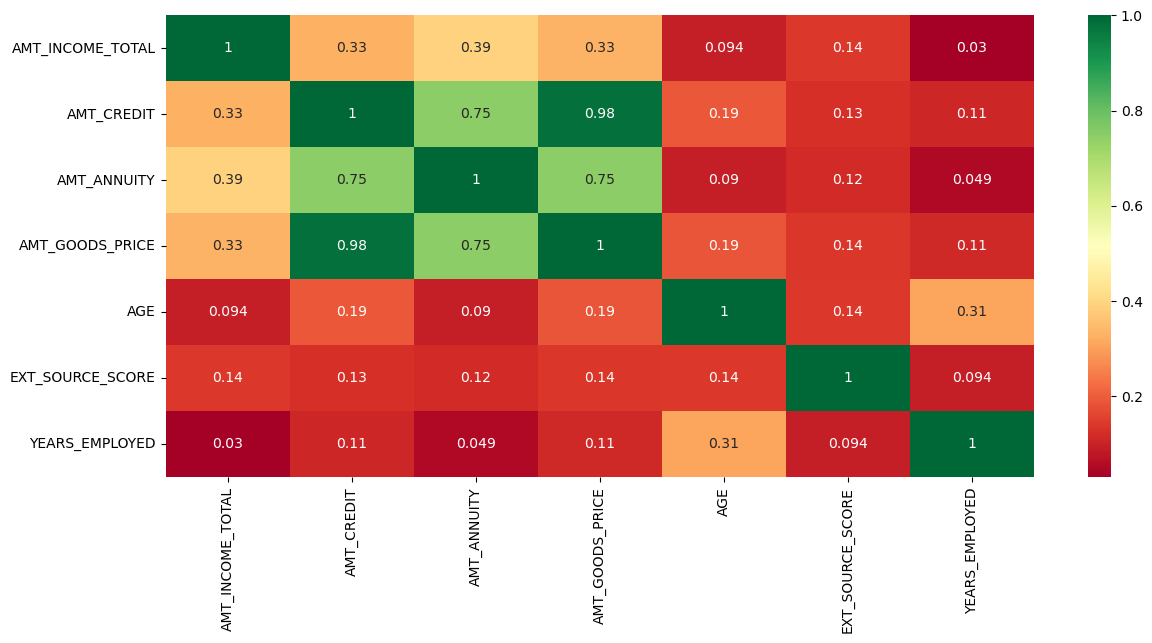

In [77]:
## Plotting a heatmap to analyse the correlation among numerical columns of Clients with Payment Difficulties

plt.figure(figsize=(14,6))
sns.heatmap(df1_correlation.corr(),cmap="RdYlGn",annot=True,cbar = True)

 Highly Corelated columns for the Defaulters (People with payment difficulties) dataframe:

* AMT_CREDIT and AMT_GOODS_PRICE has a high positive corelation of 0.98.
* AMT_CREDIT and AMT_ANNUITY has a high positive corelation of 0.75.
* AMT_ANNUITY and AMT_GOODS_PRICE has a high positive corelation of 0.75.


#### Corelation for Non-defaulters

In [78]:
## Creating dataframe for numerical columns

df0_correlation = df0[cols]
df0_correlation.head()


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,YEARS_EMPLOYED
1,270000.0,1293502.5,35698.5,1129500.0,45.931507,0.62,3.254795
2,67500.0,135000.0,6750.0,135000.0,52.180822,0.56,0.616438
3,135000.0,312682.5,29686.5,297000.0,52.068493,0.65,8.326027
4,121500.0,513000.0,21865.5,513000.0,54.608219,0.32,8.323288
5,99000.0,490495.5,27517.5,454500.0,46.413699,0.35,4.350685


In [79]:
## Creating a correlation matrix

df0_correlation.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,YEARS_EMPLOYED
AMT_INCOME_TOTAL,1.000000,0.326033,0.400625,0.333162,0.045540,0.137539,0.030120
AMT_CREDIT,0.326033,1.000000,0.762054,0.986468,0.152667,0.135709,0.087546
AMT_ANNUITY,0.400625,0.762054,1.000000,0.766577,0.091599,0.126708,0.052559
AMT_GOODS_PRICE,0.333162,0.986468,0.766577,1.000000,0.146866,0.142115,0.088666
AGE,0.045540,0.152667,0.091599,0.146866,1.000000,0.142070,0.352664
EXT_SOURCE_SCORE,0.137539,0.135709,0.126708,0.142115,0.142070,1.000000,0.081418
YEARS_EMPLOYED,0.030120,0.087546,0.052559,0.088666,0.352664,0.081418,1.000000


<Axes: >

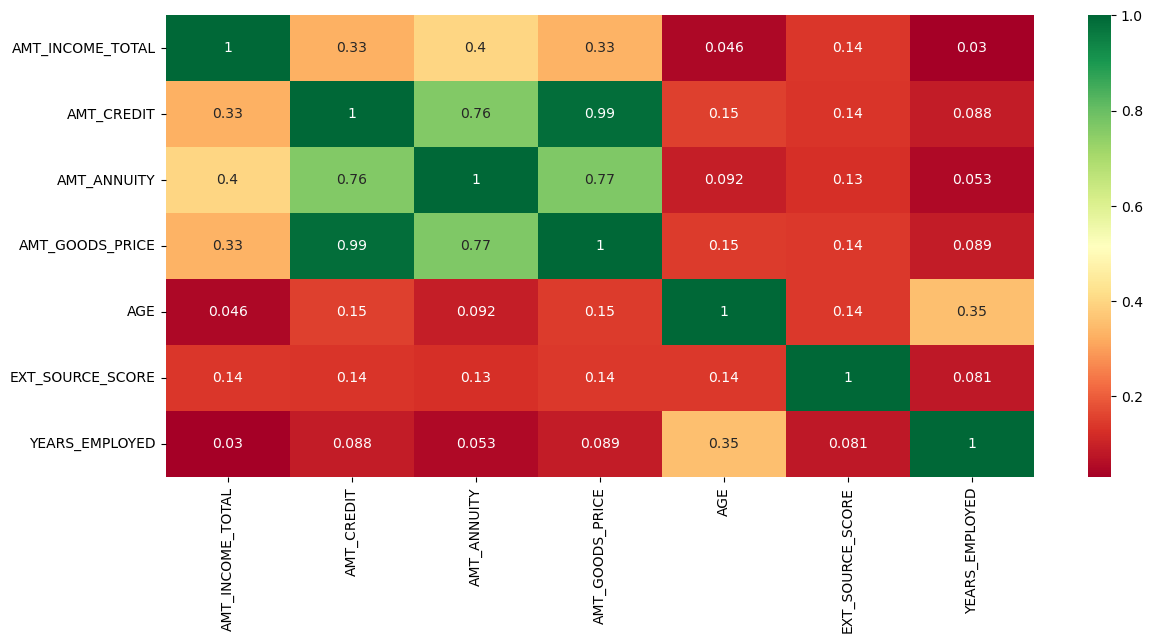

In [80]:
## Plotting a heatmap to analyse the correlation among numerical columns Clients with No Payment Difficulties

plt.figure(figsize=(14,6))
sns.heatmap(df0_correlation.corr(),cmap="RdYlGn",annot=True,cbar = True)

Highly Corelated columns for the Non-Defaulters dataframe:

* AMT_CREDIT and AMT_GOODS_PRICE has a high positive corelation of 0.99.
* AMT_CREDIT and AMT_ANNUITY has a high positive corelation of 0.76.
* AMT_ANNUITY and AMT_GOODS_PRICE has a high positive corelation of 0.77.

Conclusion:

    * We can see that for both the defaulters and non defaulters the same pairs of columns are highly corelated.
    
    * AMT_GOODS_PRICE and AMT_CREDIT has a strong positive correlation. 
          This means that as Goods price increases, the Credit Amount also increases.
    * AMT_ANNUITY and AMT_CREDIT has a strong positive correlation. 
          This means that as Annuity Amount increases, Credit Amount also increases.
    * AMT_ANNUITY and AMT_GOODS_PRICE has a strong positive correlation. 
          This means that as Annuity Amount increases, Goods Price also increases.

#### Income Range vs Credit Amount for Defaulters

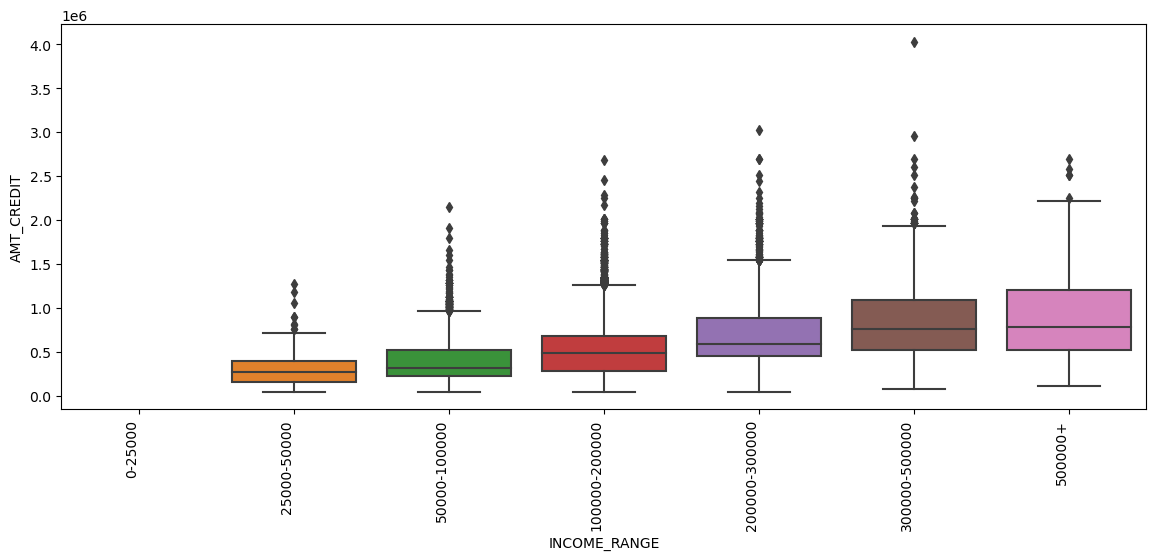

In [81]:
## Plotting boxplots to check the spread of the values

plt.figure(figsize=(14,5))
ax = sns.boxplot(df1, x="INCOME_RANGE", y="AMT_CREDIT") 
plt.title=("Income Range VS Credit Amount (Defaulters)")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

#### Income Range vs Credit Amount for Non-defaulters

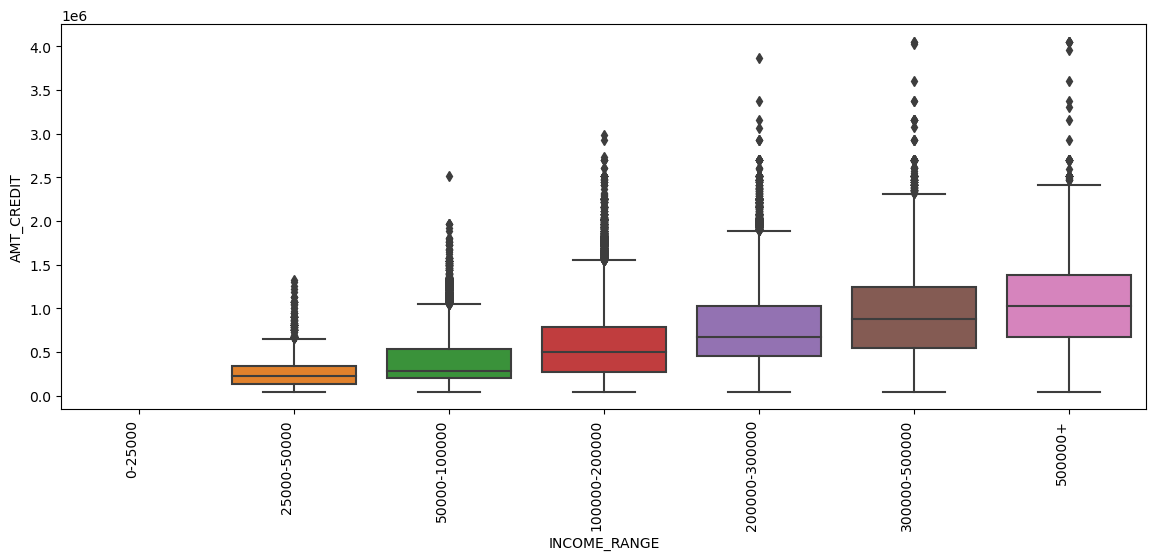

In [82]:
## Plotting boxplots to check the spread of the values

plt.figure(figsize=(14,5))
ax = sns.boxplot(df0, x="INCOME_RANGE", y="AMT_CREDIT") 
plt.title=("Income Range VS Credit Amount (Non-Defaulters)")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

Observations:

    * The corelation between Income Range and Loan Amount appears to be similiar for both defaulters and non-defaulters.
    * People with high income tend to avail more amount of credit from the bank.

#### Family Status vs Credit Amount

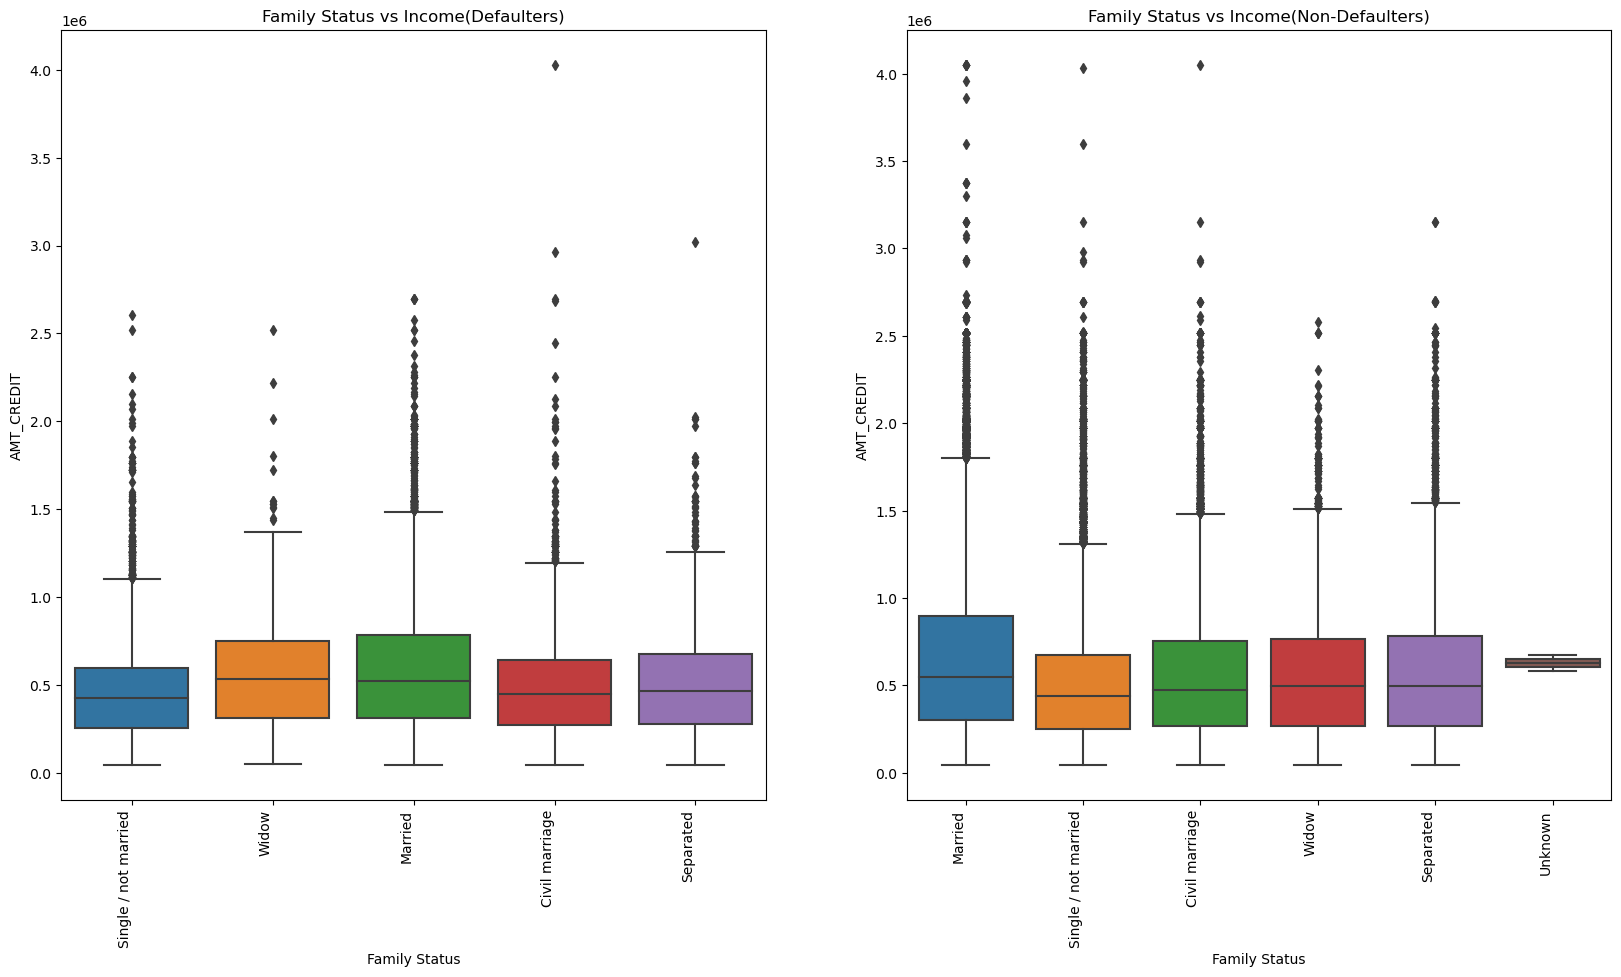

In [83]:
## Plotting boxplots to check the spread of the values

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax = sns.boxplot(df1, x="NAME_FAMILY_STATUS", y="AMT_CREDIT") 
ax.set(title = "Family Status vs Income(Defaulters)")
ax.set(xlabel='Family Status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.boxplot(df0, x="NAME_FAMILY_STATUS", y="AMT_CREDIT") 
ax.set(title = "Family Status vs Income(Non-Defaulters)")
ax.set(xlabel='Family Status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * Majority of the clients who applied for comparatively higher loan amounts are married people in both the 
      Defaulters and Non-Defaulters categories.


#### Income Type vs Credit Amount

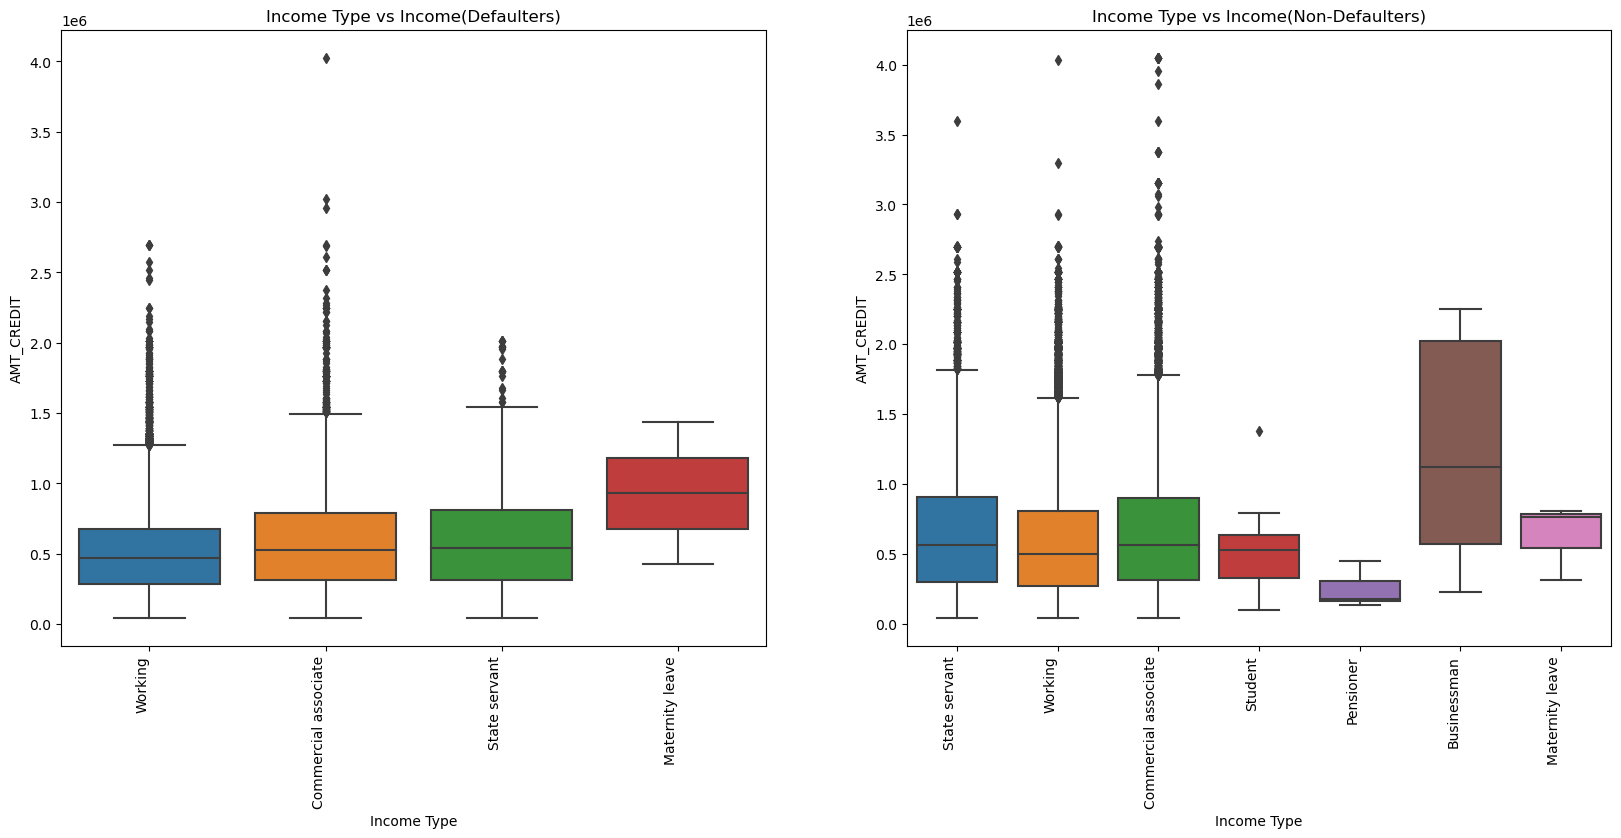

In [84]:
## Plotting boxplots to check the spread of the values

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)    
ax = sns.boxplot(df1, x="NAME_INCOME_TYPE", y="AMT_CREDIT") 
ax.set(title = "Income Type vs Income(Defaulters)")
ax.set(xlabel='Income Type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.boxplot(df0, x="NAME_INCOME_TYPE", y="AMT_CREDIT") 
ax.set(title = "Income Type vs Income(Non-Defaulters)")
ax.set(xlabel='Income Type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * While considering the Income Type, Businessman seems to be the best category to be considered for loans. 
      Income Type - Businessman does not even appear in the Defaulters dataset.
      They all make sure to repay the loan on time.
    * Student is also one of the best categories to be considered for loans. 
      They also make sure to repay the loan on time.
    * A category that would be better not to target is Female clients on maternity leave. 

#### AMT_REQ_CREDIT_BUREAU_HOUR vs AMT_CREDIT

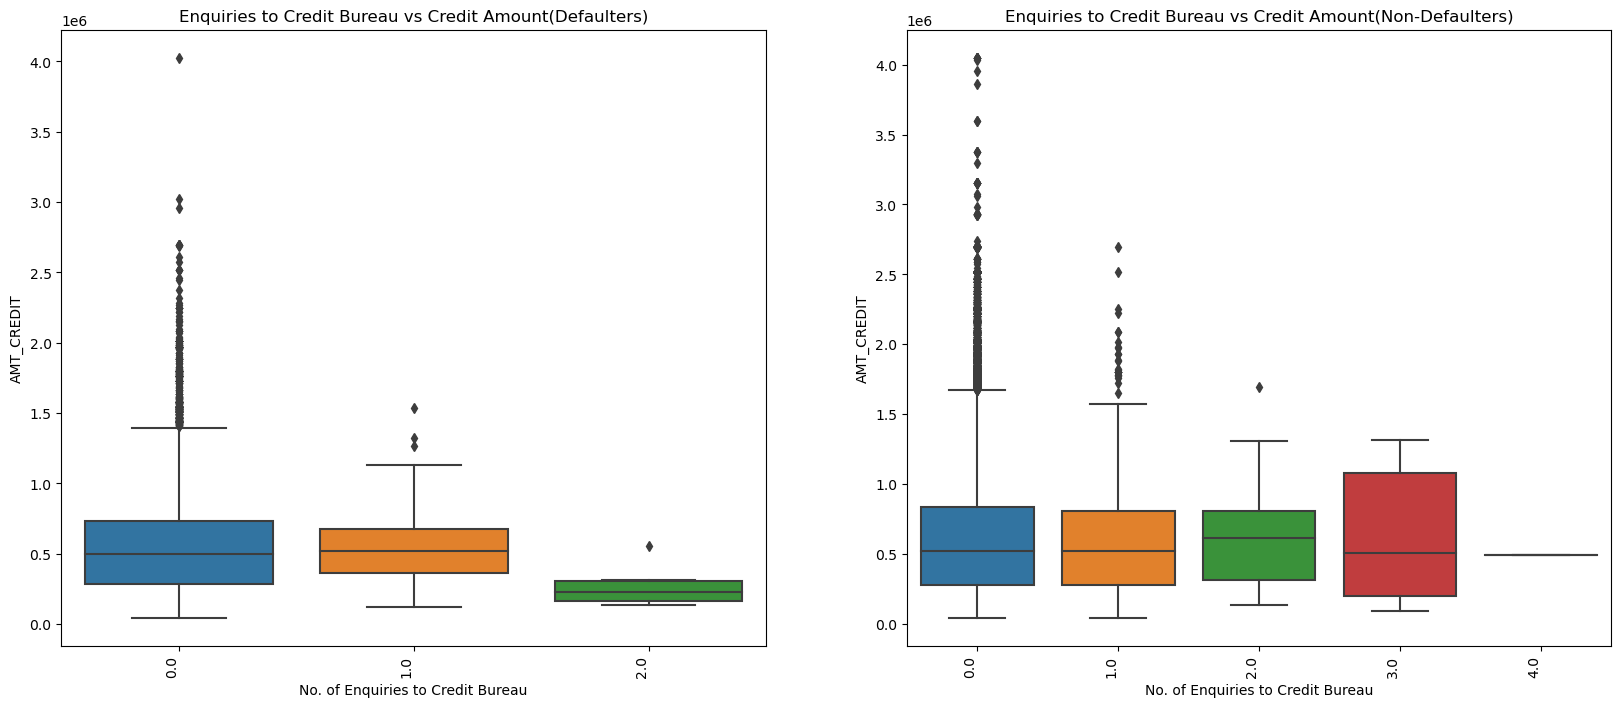

In [85]:
## Plotting boxplots to check the spread of the values

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)    
ax = sns.boxplot(df1, x="AMT_REQ_CREDIT_BUREAU_HOUR", y="AMT_CREDIT") 
ax.set(title = "Enquiries to Credit Bureau vs Credit Amount(Defaulters)")
ax.set(xlabel='No. of Enquiries to Credit Bureau')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.boxplot(df0, x="AMT_REQ_CREDIT_BUREAU_HOUR", y="AMT_CREDIT") 
ax.set(title = "Enquiries to Credit Bureau vs Credit Amount(Non-Defaulters)")
ax.set(xlabel='No. of Enquiries to Credit Bureau')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

In [86]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    250755
1.0      1318
2.0        46
3.0         8
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

Observations:

    * Clients with more number of enquiries to Credit Bureau make sure to repay the loan on time.
    * Even though the number of value counts are too low for values 3 and 4, they don't appear in the 
      Defaulter's plot.
    * It is a possibility that those clients have approached more than one bank for the loan or maybe more than one  
      time which might have resulted in more number of enquiries to the Credit Bureau. We can assume that those                  clients were actively looking for a loan.
    * The plot shows they make sure to repay the loan on time. Hence the number of enquiries to Credit Bureau can 
       be used as an effective measure to shortlist the target clients.


#### CREDIT_RANGE vs EXT_SOURCE_SCORE

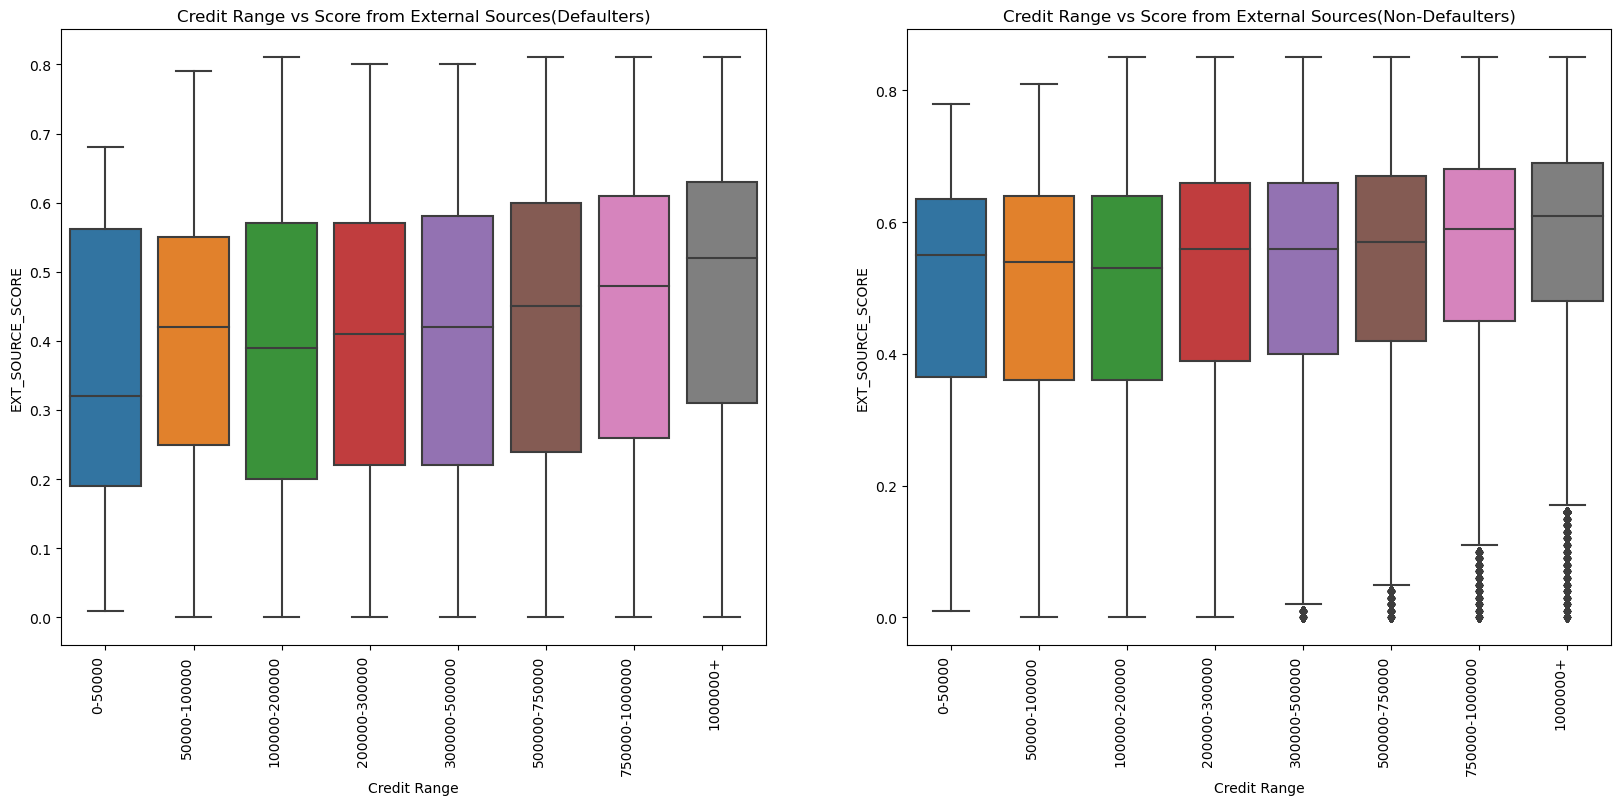

In [87]:
## Plotting boxplots to check the spread of the values

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)    
ax = sns.boxplot(df1, x="CREDIT_RANGE", y="EXT_SOURCE_SCORE") 
ax.set(title = "Credit Range vs Score from External Sources(Defaulters)")
ax.set(xlabel='Credit Range')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

plt.subplot(1,2,2) 
ax = sns.boxplot(df0, x="CREDIT_RANGE", y="EXT_SOURCE_SCORE") 
ax.set(title = "Credit Range vs Score from External Sources(Non-Defaulters)")
ax.set(xlabel='Credit Range')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * When we consider the EXT_SOURCE_SCORE i.e. Score from External Sources, we can see that the median of 
      people who repay the loan on time is moderately high than peolpe who are defaulters. 
    * Peolple with high Score from External sources make sure to repay the loan on time. Hence it is a good measure 
      to consider.

# Analysis of Previous Application Data

### Uploading and cleaning of previous application data  

In [88]:
## reading the dataset

df_prev = pd.read_csv("previous_application.csv")

In [89]:
## Checking the first 5 records of the dataframe

df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
## Checking the dimensionality of the dataframe

df_prev.shape

(1670214, 37)

In [91]:
## Checking the concise summary of the dataframe

df_prev.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Handling missing values

In [92]:
## Finding number of missing values in each columns

df_prev.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [93]:
## Finding percentage of missing values in each columns

cols_missing = 100*df_prev.isnull().mean()
cols_missing

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [94]:
## Finding columns with more than 40% of missing values and converting the column names to a list.

missing_cols_40 = cols_missing[cols_missing.values > 40].index.to_list()
missing_cols_40

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [95]:
## Dropping all the columns having more than 40% of null values

df_prev = df_prev.drop(labels = missing_cols_40, axis = 1)

### Handling unknown/ incorrect data

NAME_CASH_LOAN_PURPOSE column

In [96]:
df_prev['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

XAP and XNA values don't provide any proper understadning about the Loan Purpose. But, as they form more than 95% 
of the data in the NAME_CASH_LOAN_PURPOSE column, leaving it as it is.


DAYS_DECISION column

In [97]:
df_prev['DAYS_DECISION'].value_counts()

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

All the records in DAYS_DECISION column are negative values

In [98]:
## Converting the negative values in DAYS_DECISION column to absolute values

df_prev['DAYS_DECISION']= df_prev['DAYS_DECISION'].abs()

In [99]:
df_prev['DAYS_DECISION'].value_counts()

245     2444
238     2390
210     2375
273     2350
196     2315
        ... 
2882     163
2922     162
2921     158
2902     148
1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

Values in the DAYS_DECISION column have been converted to absolute values.

NAME_CLIENT_TYPE column

In [100]:
100*df_prev.NAME_CLIENT_TYPE.value_counts(normalize = True)

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

There are a few records with XNA values.

In [101]:
## Replacing XNA values with the most common value

df_prev["NAME_CLIENT_TYPE"] = df_prev["NAME_CLIENT_TYPE"].replace("XNA",df_prev.NAME_CLIENT_TYPE.mode()[0])

In [102]:
100*df_prev.NAME_CLIENT_TYPE.value_counts(normalize = True)

Repeater     73.834970
New          18.043376
Refreshed     8.121654
Name: NAME_CLIENT_TYPE, dtype: float64

XNA values have been imputed by "Repeater"

### Outlier detection

#### Analyzing all the AMT columns for outliers

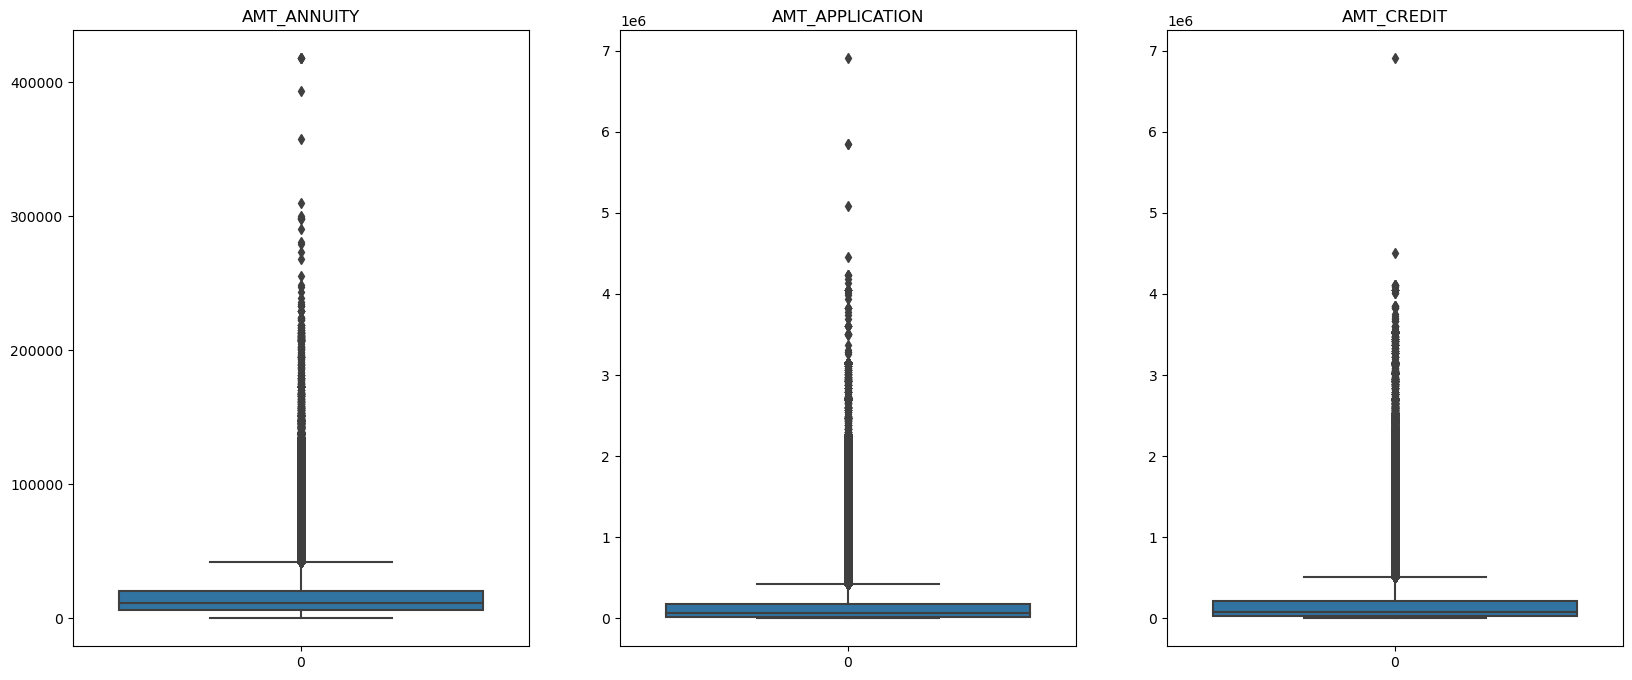

In [103]:
## Plotting boxplots to check for the outliers.

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)    
ax = sns.boxplot(df_prev.AMT_ANNUITY) 
ax.set(title = "AMT_ANNUITY")

plt.subplot(1,3,2) 
ax = sns.boxplot(df_prev.AMT_APPLICATION) 
ax.set(title = "AMT_APPLICATION")

plt.subplot(1,3,3) 
ax = sns.boxplot(df_prev.AMT_CREDIT) 
ax.set(title = "AMT_CREDIT")
plt.show()

There are outliers in AMT_ANNUITY,AMT_APPLICATION and AMT_CREDIT columns

### Univariate Analysis on Previous Application Data

In [104]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


[Text(0.5, 0, 'Loan Application Status')]

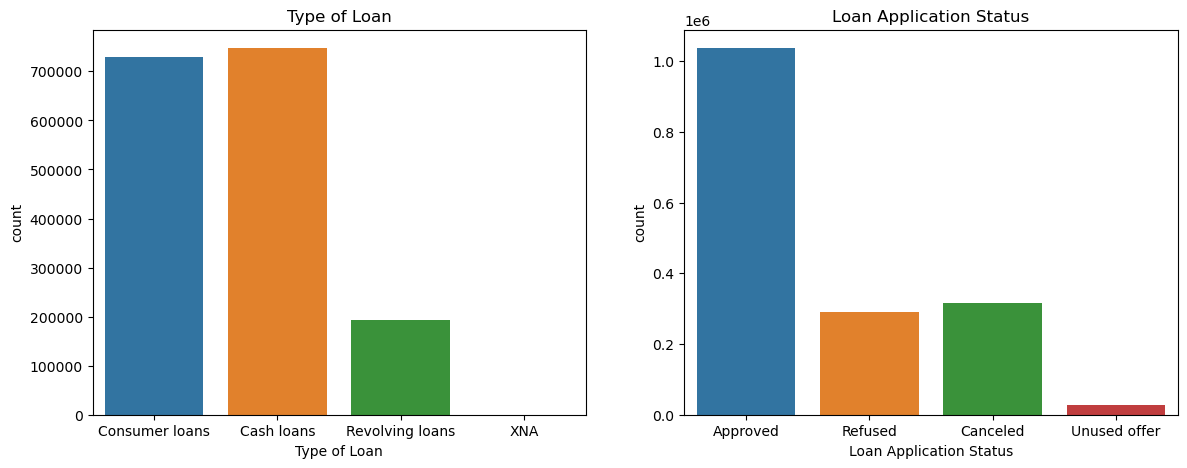

In [105]:
## Plotting countplots for NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS columns.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_prev)
ax.set(title = "Type of Loan")
ax.set(xlabel='Type of Loan')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_prev)
ax.set(title = "Loan Application Status")
ax.set(xlabel='Loan Application Status')

Observations:

    * It is evident that the most number of approved loans are Cash Loans closely followed by Consumer Loans.
    * Majority of the loan applications were approved and there are only a few Unused offers.

#### Loan Application Status

<Figure size 1400x1400 with 0 Axes>

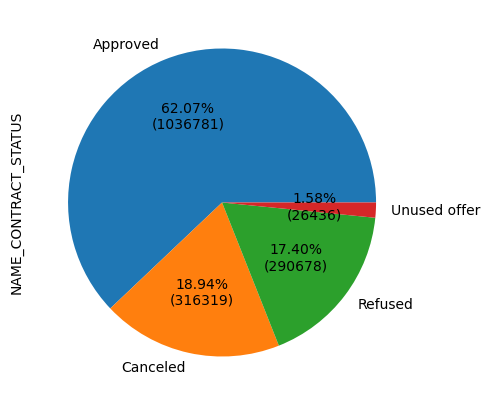

In [106]:
## Plotting a pie chart to visualise the Loan Application Status in detail.
plt.figure(figsize= (14,14))
total = len(df_prev["NAME_CONTRACT_STATUS"])

def format_func(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.figure(figsize = [5, 5])
df_prev["NAME_CONTRACT_STATUS"].value_counts().plot.pie(autopct = format_func)

plt.show()

Observations:

    * More than 62% of the loan applications are sanctioned, 18.94% are Canceled, 17.4% are Refused and 1.58% are             unused offers.

NAME_CLIENT_TYPE vs NAME_PAYMENT_TYPE

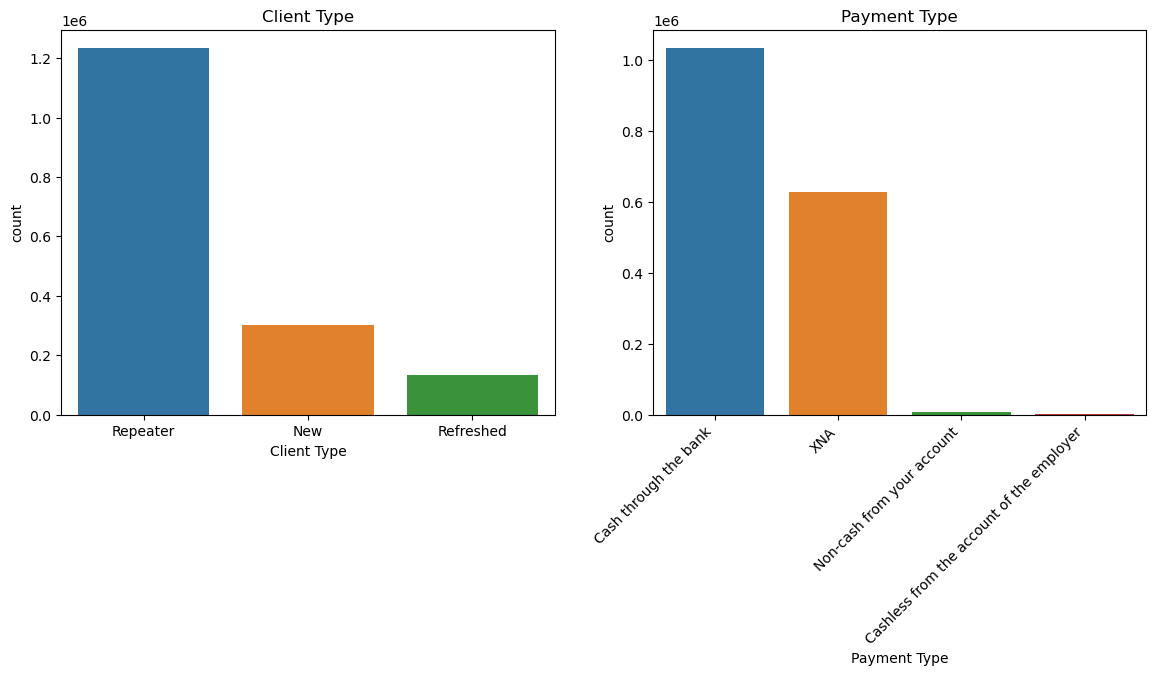

In [107]:
## Plotting countplots for Client types and Payment Type.

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_prev)
ax.set(title = "Client Type")
ax.set(xlabel='Client Type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_PAYMENT_TYPE',data=df_prev)
ax.set(xlabel='Payment Type')
ax.set(title = "Payment Type")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Observations:

    * Majority of the loan applications are from clients who are Repeaters. 
    * Most of the clients opted to pay cash through the bank. 

NAME_GOODS_CATEGORY column

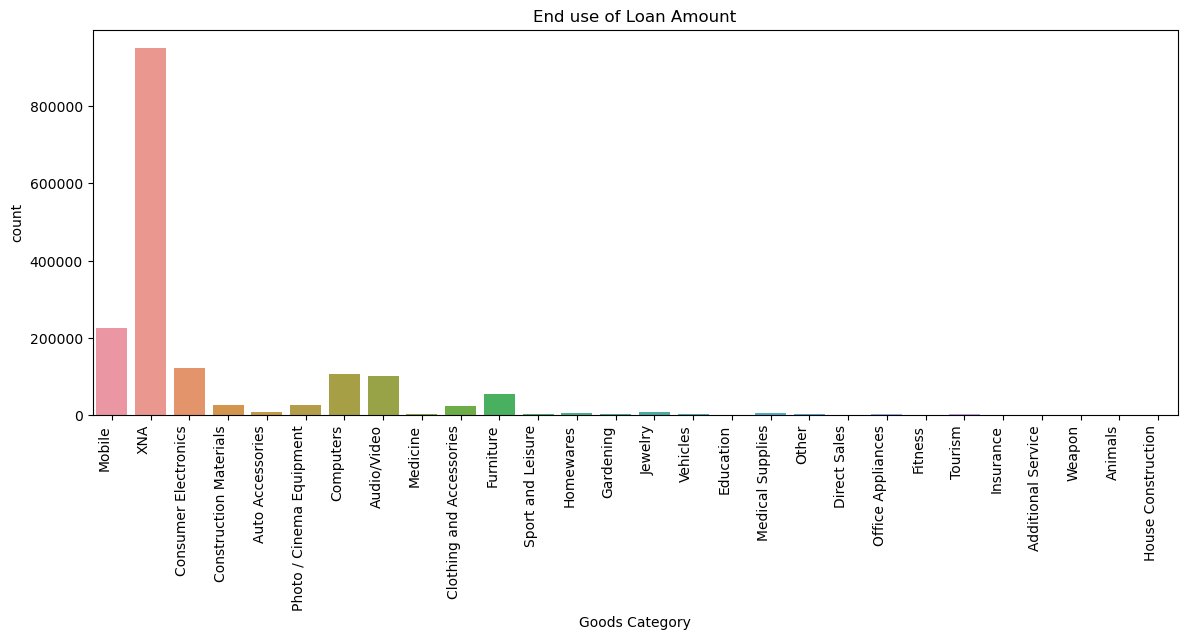

In [108]:
## Plotting a countplot for NAME_GOODS_CATEGORY column.

plt.figure(figsize=(14,5))
ax = sns.countplot(x = 'NAME_GOODS_CATEGORY',data=df_prev)
ax.set(xlabel='Goods Category')
ax.set(title = "End use of Loan Amount")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * The end use of the loan amount was not known in majority of the cases(XNA).
    * In case of known cases, most of the clients spent their loan amounts for Mobiles, Consumer Electronics and            Computers respectively.

CODE_REJECT_REASON column

[Text(0.5, 1.0, 'Loan Rejection Reason')]

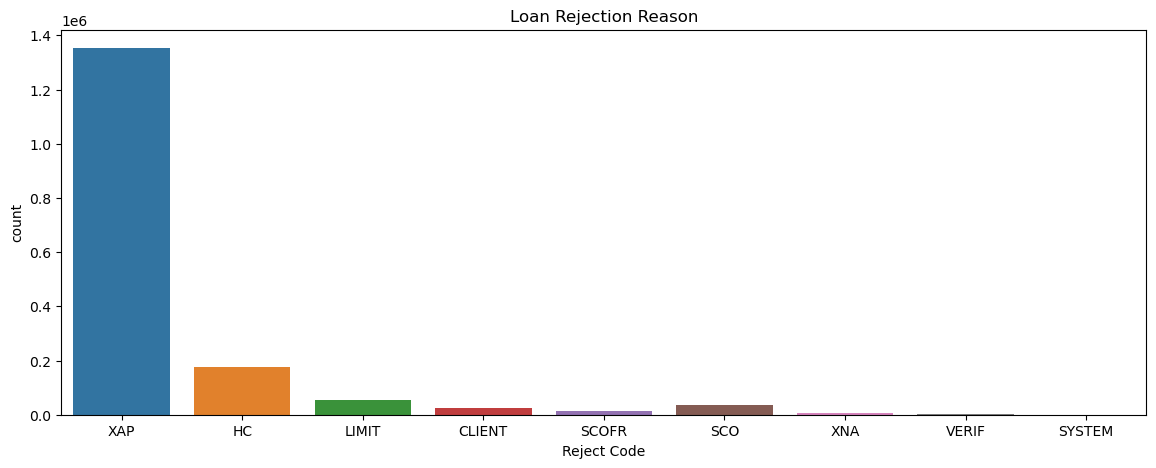

In [109]:
## Plotting a countplot for CODE_REJECT_REASON column.

plt.figure(figsize=(14,5))
ax = sns.countplot(x = 'CODE_REJECT_REASON',data=df_prev)
ax.set(xlabel='Reject Code')
ax.set(title = "Loan Rejection Reason")

Observations:

    * Majority of the loan applications were rejected because of the Rejection Code - "HC"

### Bivariate Analysis on Previous Application Data

Columns AMT_APPLICATION vs AMT_GOODS_PRICE

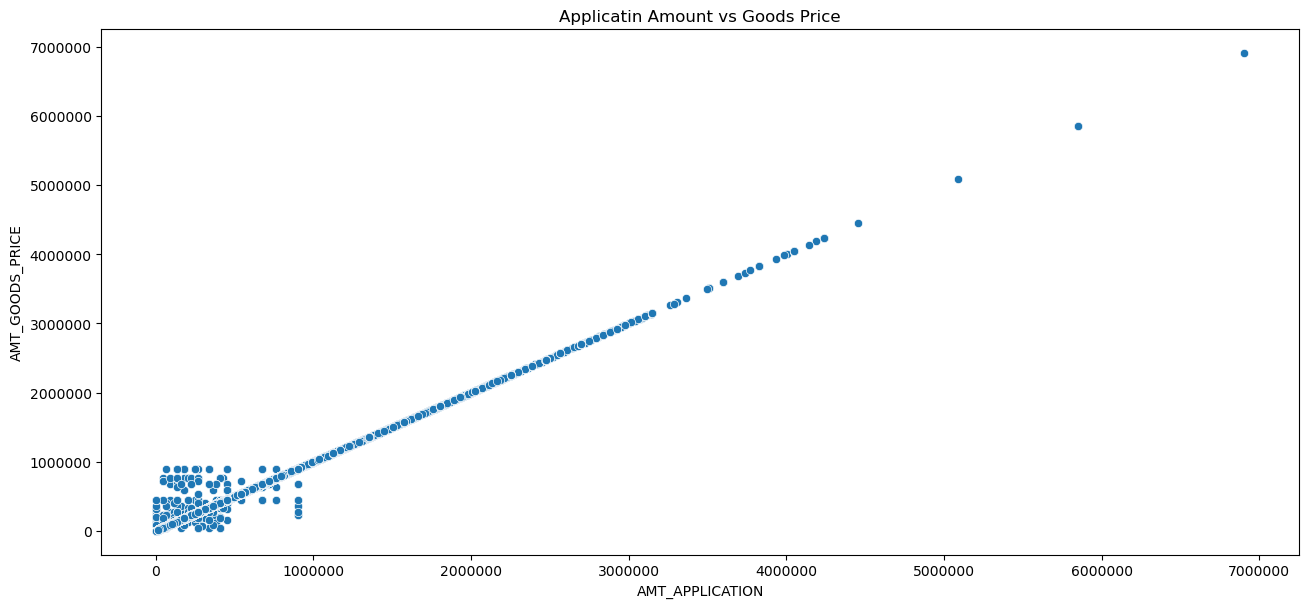

In [110]:
## Plotting a Scatterplot to check the relationship between AMT_APPLICATION and AMT_GOODS_PRICE.

plt.figure(figsize = (14,7))
ax = sns.scatterplot(data = df_prev, x ="AMT_APPLICATION", y = "AMT_GOODS_PRICE" )
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
ax.set(title = "Applicatin Amount vs Goods Price")
plt.tight_layout(pad = 4)
plt.show()


Observations:

    * Loan Application Amount has a strong positive corelation with the Goods Price.

AMT_APPLICATION vs AMT_CREDIT

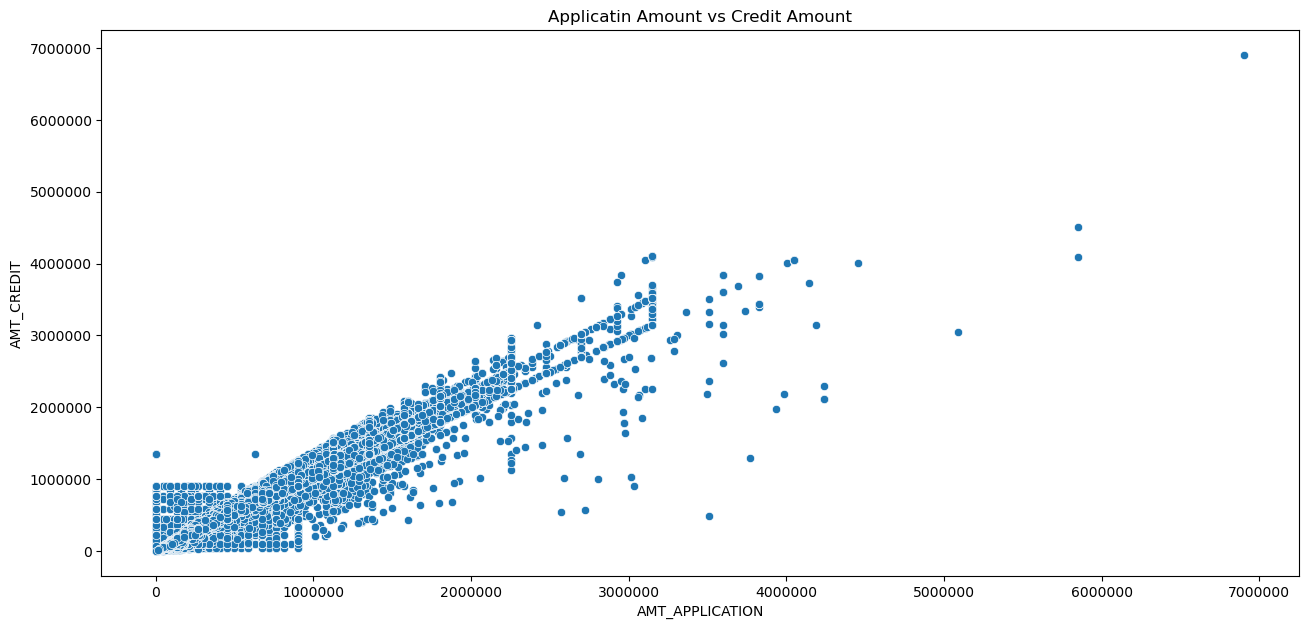

In [111]:
## Plotting a Scatterplot to check the relationship between AMT_APPLICATION and AMT_GOODS_PRICE.

plt.figure(figsize = (14,7))
ax = sns.scatterplot(data = df_prev, x ="AMT_APPLICATION", y = "AMT_CREDIT" )
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
ax.set(title = "Applicatin Amount vs Credit Amount")
plt.show()

Observations:

    * Loan Application amount seems to have a positive corelation with the Credit amount.

#### Combining both the Previous and Current applications and creating a new dataframe called df_merge

In [112]:
df_merge = df.merge(df_prev,  right_on='SK_ID_CURR',left_on='SK_ID_CURR', how='inner')

In [113]:
## checking the dimensionality of the new dataframe

df_merge.shape

(1140096, 56)

In [114]:
df_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OCCUPATION_TYPE,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,EXT_SOURCE_SCORE,AGE,YEARS_EMPLOYED,AGE_GROUP,WORK_EXPERIENCE,INCOME_RANGE,CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,Laborers,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.26,25.920548,1.745205,20-30,0-2,200000-300000,300000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1186.0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.62,45.931507,3.254795,40-50,2-5,200000-300000,1000000+,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1186.0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.62,45.931507,3.254795,40-50,2-5,200000-300000,1000000+,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1186.0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.62,45.931507,3.254795,40-50,2-5,200000-300000,1000000+,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.56,52.180822,0.616438,50-60,0-2,50000-100000,100000-200000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [115]:
## Creating a dataframe of numerical variables to check the corelation among the numerical columns.

corr_df_merge = df_merge[ ["CNT_PAYMENT", "AMT_APPLICATION","AMT_CREDIT_x","AMT_CREDIT_y","AMT_ANNUITY_x", 
                           "AMT_ANNUITY_y", "AMT_GOODS_PRICE_x","AMT_GOODS_PRICE_y"]   ].corr()

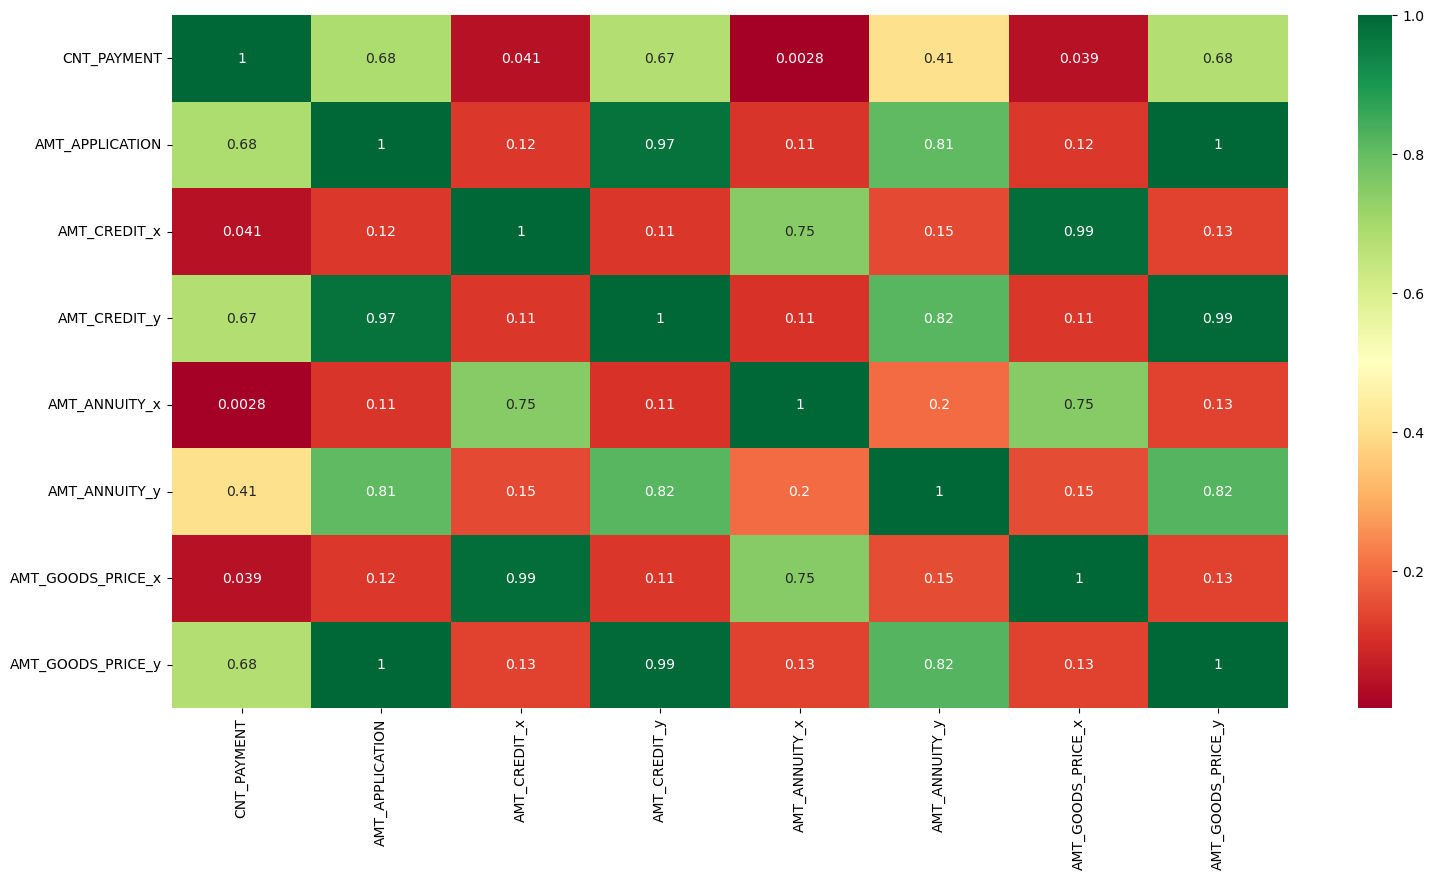

In [116]:
## Creating a Heatmap to check the corelation.

plt.figure(figsize = (18,9))
sns.heatmap(data = corr_df_merge,cmap = "RdYlGn", annot = True,cbar = True)
plt.show()

Observations:

* AMT_APPLICATION    - There is a high positive corelation with AMT_GOODS_PRICE_y, AMT_ANNUITY_y and AMT_CREDIT_y.
* AMT_CREDIT_x       - There is a high positive corelation with AMT_GOODS_PRICE_x and a good positive corelation with AMT_ANNUITY_x. 
* AMT_CREDIT_y       - There is a high positive corelation with AMT_GOODS_PRICE_y, AMT_ANNUITY_y and AMT_APPLICATION.
* AMT_ANNUITY_x      - There is a good positive corelation with AMT_GOODS_PRICE_x and AMT_CREDIT_x.
* AMT_ANNUITY_y      - There is a high positive corelation with AMT_GOODS_PRICE_y, AMT_CREDIT_y and AMT_APPLICATION.
* AMT_GOODS_PRICE_x  - There is a high positive corelation with AMT_CREDIT_x and a good positive corelation with AMT_ANNUITY_x.
* AMT_GOODS_PRICE_y  - There is a high positive corelation with AMT_ANNUITY_y, AMT_CREDIT_y and AMT_APPLICATION.


NAME_CASH_LOAN_PURPOSE vs TARGET 1

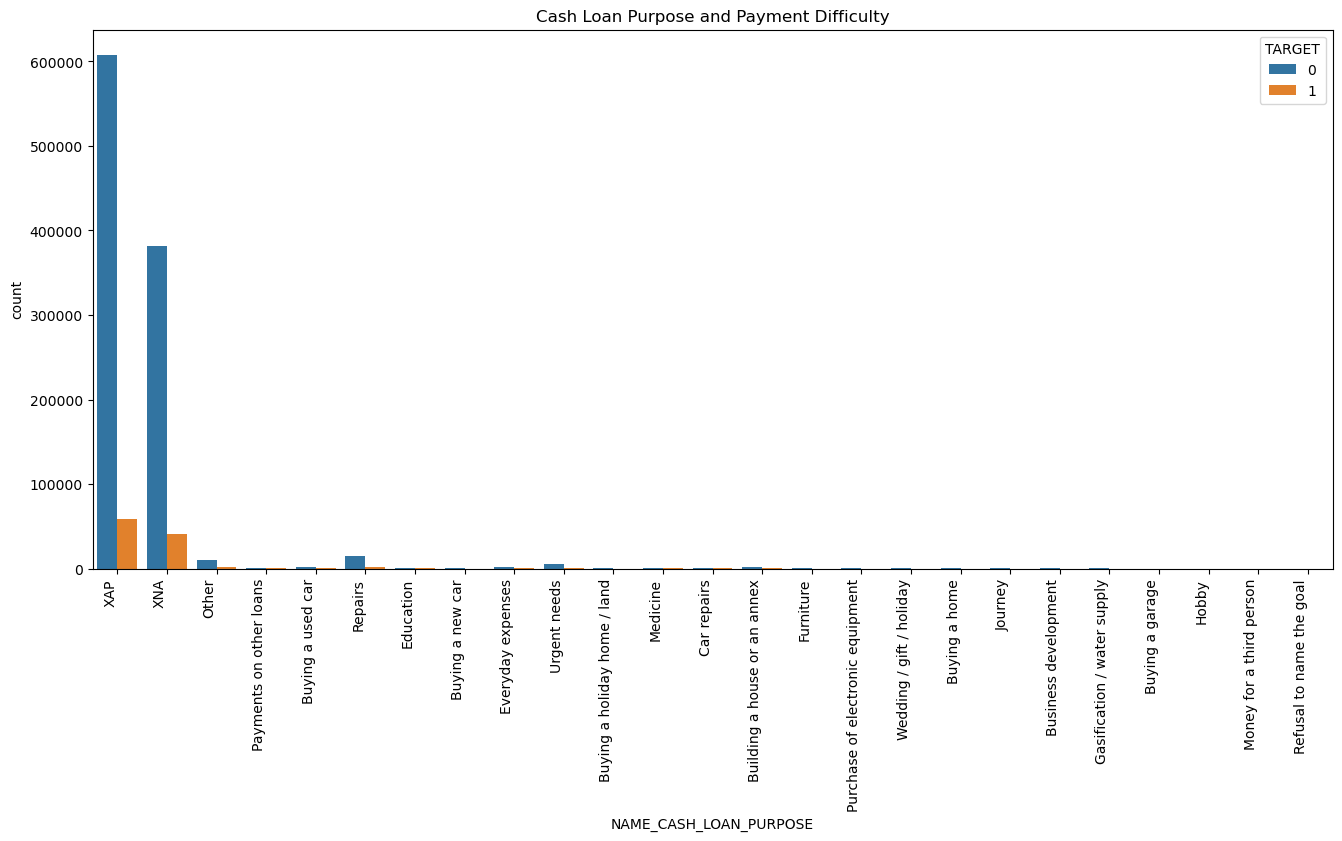

In [117]:
## Plotting a countplot to check the relationship between NAME_CASH_LOAN_PURPOSE and the Payment Difficulty.

plt.figure(figsize = (16,7))
ax = sns.countplot(data = df_merge, x = "NAME_CASH_LOAN_PURPOSE", hue = "TARGET")
ax.set(title = "Cash Loan Purpose and Payment Difficulty")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * It appears that clients who availed loans for Repairs in the Previous Application are among the top category 
      who defaulted the repayments in the current application.(XAP and XNA are unknown values)

NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS

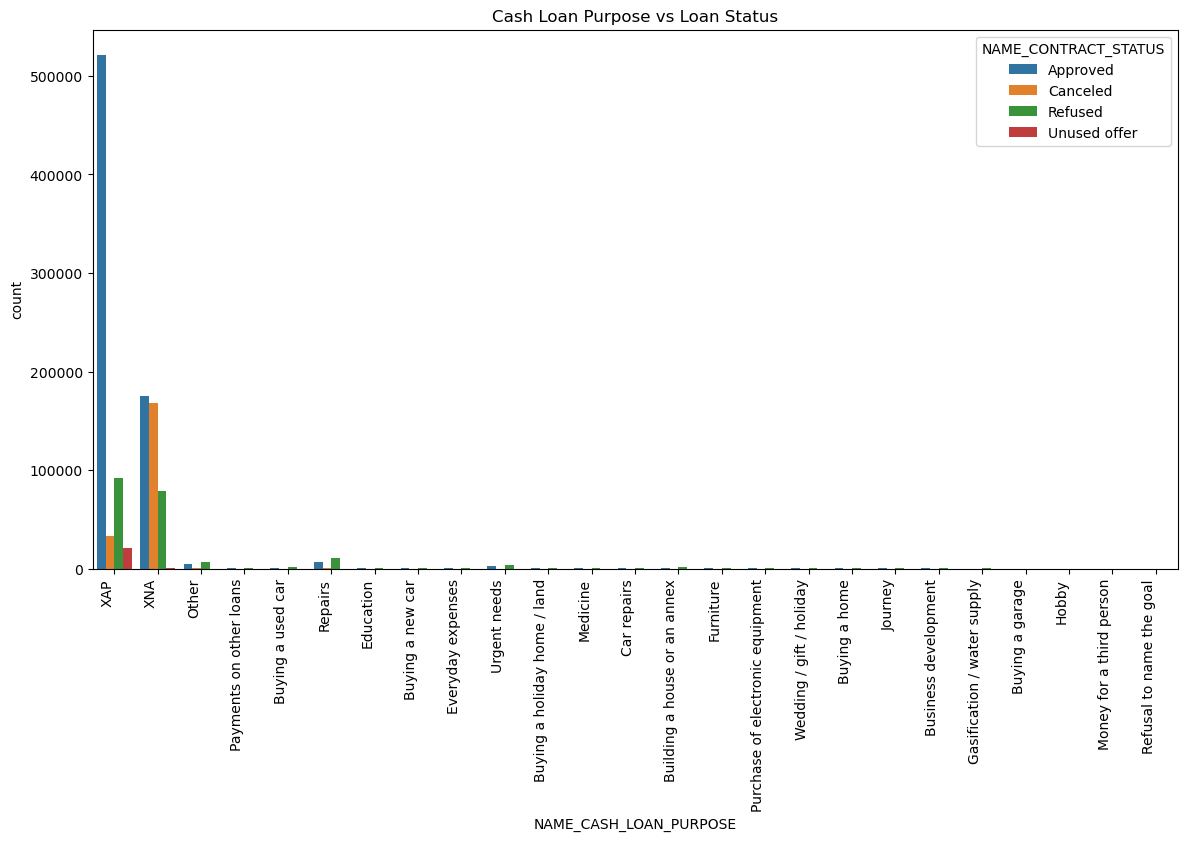

In [118]:
## Plotting a countplot to check the relationship between the Cash loan purpose and the Loan status.

plt.figure(figsize = (14,7))
ax = sns.countplot(data = df_merge, x = "NAME_CASH_LOAN_PURPOSE", hue = "NAME_CONTRACT_STATUS")
ax.set(title = "Cash Loan Purpose vs Loan Status")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')

Observations:

    * Most number rejections happened in the loan purpose - Repairs. (XAP and XNA are unknown values)

# Insights:


* "Businessman", "Pensioner" and "Student"  are the best categories to be considered for loans.


* Clients with high "Score from External Sources" make sure to repay the loan on time.  Hence it is recommended to       target clients with high "Score from External Sources".


* Clients with more number of "Enquiries to Credit Bureau" make sure to repay the loan on time. Considering other         factors like high "Score from External Sources" and "Income Type" with more number of "Enquiries to Credit Bureau"
  is recommended.


* Majority of the clients spend their loan amounts on Mobiles, Consumer Electronics and  Computers. A business plan to   target such clients would result in more profitability.

* It is highly recommended not to target female clients who are on maternity leave. 

* Clients who availed loan for "Repairs" are among the top category who defaulted the repayment. 
  Hence it is recommended to be cautious while considering the loan applications for "Repairs".

* Majority of the loan applications were rejected because of the Rejection Code - "HC”. 
  Analysing on Rejection Code - "HC” in the initial stages of the loan assessment itself would be a better approach.